In [875]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast
from wordcloud import WordCloud,STOPWORDS
from collections import OrderedDict, Counter
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

train_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/train.csv'
test_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/test.csv'
#train_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/train.csv'
#test_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/test.csv'

def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

train = pd.read_csv(train_path, **io_params)
train.info()
print(train.describe())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   3000 non-null   object 
 11  production_countries   3000 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       3000 non-null   object 
 15  stat

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


REVENUE

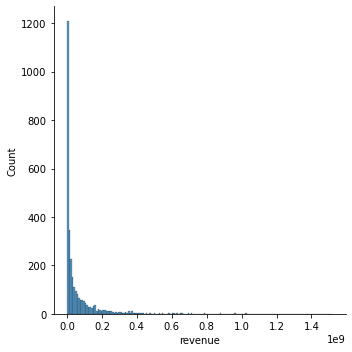

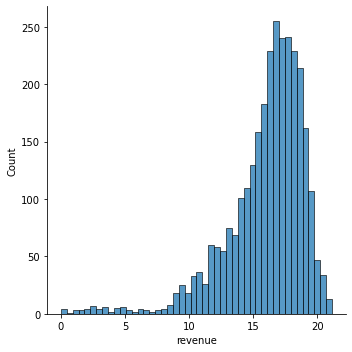

In [876]:
sns.displot(train.revenue)
sns.displot(np.log(train.revenue))

In [968]:
for i, e in enumerate(train['revenue']):
    if(e == 1):
        print(i, e)

347 1
1754 1
1874 1
1917 1


In [878]:
train['logRevenue'] = train['revenue'].apply(lambda x: np.log(x))
train

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,logRevenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959
3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512
4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099
5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,[],0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441
2997,[],0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,...,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985
2998,[],65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The 

BELONGS TO COLLECTION

In [879]:
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 []
3 []
4 []


In [880]:
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
sum(train['has_collection'])

train = train.drop(['belongs_to_collection'], axis=1)
train.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,logRevenue,has_collection
id,,,,,,,,,,,,,,,,,,,,,
1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1
3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0
4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0
5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0


BUDGET

In [881]:
for i, e in enumerate(train['budget']):
    if e <=1e5:
        print(i, e)

4 0
7 0
8 0
11 0
17 0
22 0
23 0
24 0
25 0
31 0
33 0
36 0
38 0
40 0
48 0
52 0
53 0
55 0
56 0
58 0
62 0
67 0
71 0
73 0
78 0
89 0
91 0
93 0
95 0
97 0
102 0
103 0
104 0
116 0
117 0
118 0
126 0
132 0
136 0
138 0
141 0
145 0
146 0
148 0
150 0
151 0
152 0
154 0
157 0
161 0
165 0
166 0
170 0
171 0
177 0
181 0
182 0
189 0
192 0
193 0
195 0
206 0
208 0
212 0
218 0
221 0
224 0
225 0
232 0
233 0
235 0
237 0
240 0
242 0
243 0
244 0
253 0
254 11178
258 0
259 24554
260 0
262 0
264 0
267 27000
269 0
275 0
278 0
280 0
287 0
293 0
295 0
302 0
303 0
304 0
313 0
320 0
330 0
333 0
334 1
337 0
340 0
342 0
343 0
345 0
347 12
352 0
355 0
360 0
365 7000
367 0
368 0
370 0
379 0
383 0
386 0
392 0
395 0
396 0
397 0
402 0
403 0
404 0
409 0
416 0
417 0
425 0
427 0
435 0
436 0
441 0
442 0
443 0
445 0
451 0
452 0
454 0
455 0
460 0
463 0
465 0
469 113
475 0
479 0
480 0
484 0
493 0
498 0
500 0
502 0
504 0
508 60000
512 93
514 0
521 0
524 0
531 0
539 0
549 0
553 0
555 0
556 0
560 0
561 0
564 0
565 0
575 0
577 0
579 0
58

In [882]:
train['isBudgetDirty'] = train['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =train[train['budget'] >= 1e5]['budget'].mean()
mean_budget

31424185.22501162

In [883]:
train.loc[train.budget < 1e5, 'budget'] = mean_budget

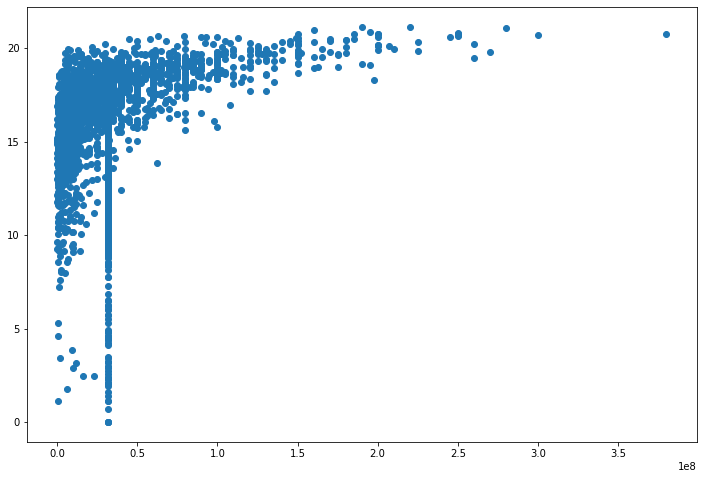

In [884]:
plt.figure(figsize=(12,8))
plt.scatter("budget", "logRevenue", data=train)
plt.show()

GENRES

In [885]:
for i, e in enumerate(train['genres'][:5]):
    for gen in e:
        print(gen['name'])

Comedy
Comedy
Drama
Family
Romance
Drama
Thriller
Drama
Action
Thriller


In [886]:
train['list_of_genres'] = train['genres'].apply(lambda x: [gen['name'] for gen in x])
train['genre_count'] = train['list_of_genres'].apply(lambda x: len(x))
train = train.drop(['genres'], axis=1)
train = train.drop(['list_of_genres'], axis=1)
train.head()

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,tagline,title,Keywords,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,genre_count
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,1
2,4.000000e+07,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,4
3,3.300000e+06,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,1
4,1.200000e+06,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,2
5,3.142419e+07,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,2


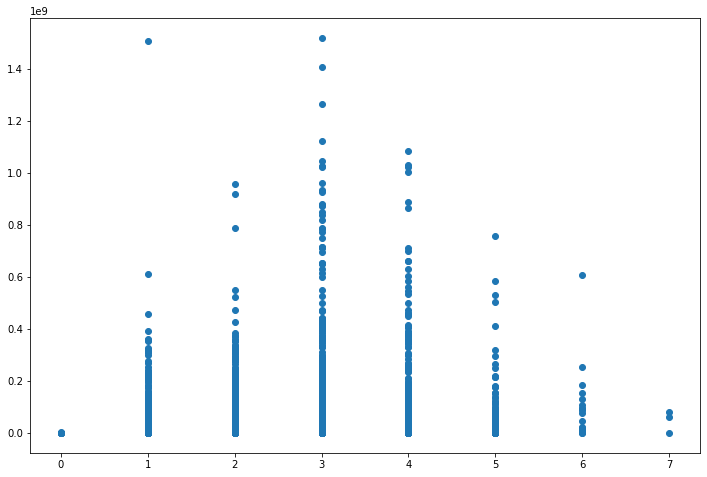

In [887]:
plt.figure(figsize=(12,8))
plt.scatter("genre_count", "revenue", data=train)
plt.show()

In [888]:
#train.head()
#list_of_genres = []
#for l in train['list_of_genres']:
#    for gen in l:
#        list_of_genres.append(gen)

#list_of_genres
#len(list_of_genres)
#unique_genres = set(list_of_genres)
#unique_genres
#len(unique_genres)
#Counter(list_of_genres).most_common(12)

HOMEPAGE

In [889]:
train['hasHomepage'] = train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
train = train.drop(['homepage'], axis=1)

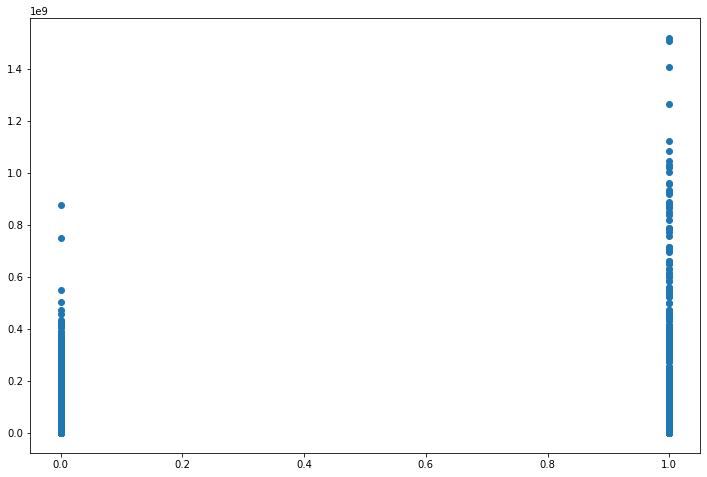

In [890]:
plt.figure(figsize=(12,8))
plt.scatter("hasHomepage", "revenue", data=train)
plt.show()

IMDB ID

In [891]:
train = train.drop(['imdb_id'], axis=1)


In [892]:
train

,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,...,title,Keywords,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,genre_count,hasHomepage
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,1,0
2,4.000000e+07,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,4,0
3,3.300000e+06,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,...,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,1,1
4,1.200000e+06,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,...,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,2,1
5,3.142419e+07,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,...,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,1,2,0
2997,3.142419e+07,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,...,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,1,2,0
2998,6.500000e+07,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,...,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,0,4,0


ORIGINAL LANGUAGE

In [893]:
list_of_languages = []
for lan in train['original_language']:
    list_of_languages.append(lan)
print(Counter(list_of_languages))
unique_languages = set(list_of_languages)
len(unique_languages)

Counter({'en': 2575, 'fr': 78, 'ru': 47, 'es': 43, 'hi': 42, 'ja': 37, 'it': 24, 'ko': 20, 'cn': 20, 'zh': 19, 'de': 18, 'ta': 16, 'sv': 8, 'nl': 6, 'pt': 6, 'fa': 5, 'da': 5, 'ro': 4, 'tr': 3, 'hu': 3, 'te': 2, 'fi': 2, 'no': 2, 'pl': 2, 'ml': 2, 'sr': 1, 'cs': 1, 'mr': 1, 'el': 1, 'ur': 1, 'he': 1, 'ar': 1, 'nb': 1, 'vi': 1, 'bn': 1, 'id': 1})


36

In [894]:
train['is_english'] = train['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
train = train.drop(['original_language'], axis=1)

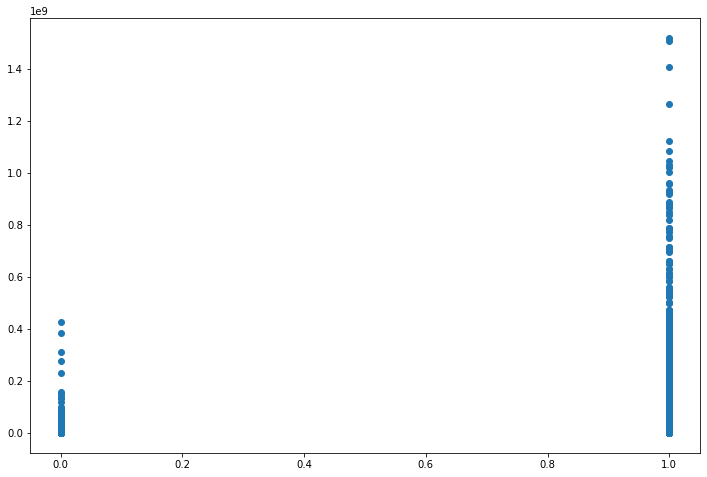

In [895]:
plt.figure(figsize=(12,8))
plt.scatter("is_english", "revenue", data=train)
plt.show()

ORIGINAL TITLE

In [896]:
train = train.drop(['original_title'], axis=1)

OVERVIEW

In [897]:
train = train.drop(['overview'], axis=1)

POPULARITY

In [898]:
train['logPop'] = train['popularity'].apply(lambda x: np.log(x)) #prova

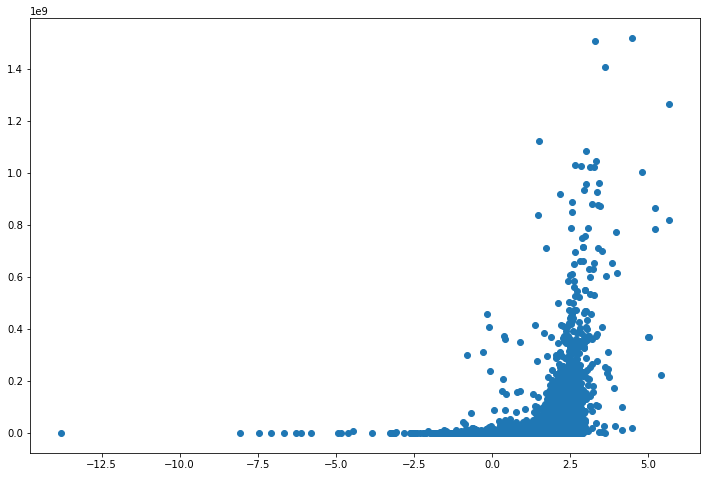

In [899]:
plt.figure(figsize=(12,8))
plt.scatter("logPop", "revenue", data=train)
plt.show()

In [900]:
train = train.drop(['logPop'], axis=1)

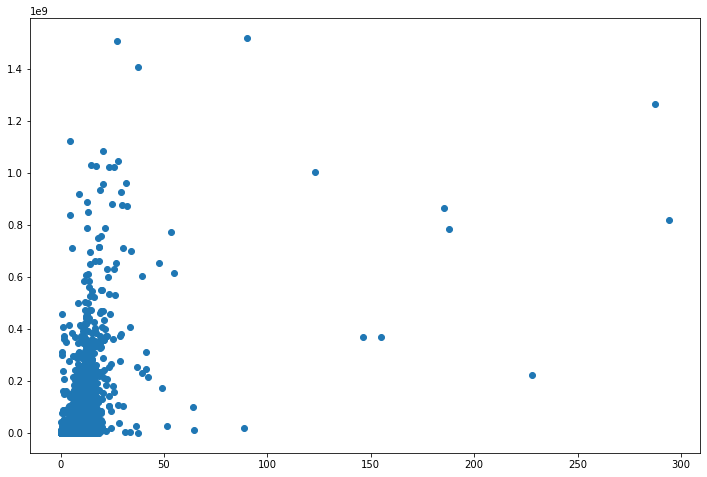

In [901]:
plt.figure(figsize=(12,8))
plt.scatter("popularity", "revenue", data=train)
plt.show()

POSTER PATH

In [902]:
train = train.drop(['poster_path'], axis=1)

PRODUCTION COMPANIES

In [903]:
for i, e in enumerate(train['production_companies']):
    for comp in e:
        print(comp['name'])

Paramount Pictures
United Artists
Metro-Goldwyn-Mayer (MGM)
Walt Disney Pictures
Bold Films
Blumhouse Productions
Right of Way Films
Ghost House Pictures
North Box Productions
Walt Disney Pictures
Jim Henson Productions
Jim Henson Company, The
Castle Rock Entertainment
United Artists
Twentieth Century Fox Film Corporation
Amercent Films
American Entertainment Partners L.P.
Interscope Communications
DreamWorks SKG
Jinks/Cohen Company
Double Feature Films
Jersey Films
Nina Saxon Film Design
Metro-Goldwyn-Mayer (MGM)
DreamWorks SKG
Cruise/Wagner Productions
Amblin Entertainment
Twentieth Century Fox Film Corporation
Blue Tulip Productions
Ronald Shusett/Gary Goldman
Digital Image Associates
Hypnopolis
DreamWorks SKG
Craven-Maddalena Films
BenderSpink
BBC Films
Headline Pictures
Magnolia Mae Films
Taeoo Entertainment
UK Film Council
Prescience
Aegis Film Fund
Kaleidoscope Films
Twentieth Century Fox Film Corporation
Current Entertainment
TF1 Films Production
Canal+
TPS Star
EuropaCorp
Sea 

The Combine
Bluegrass Films
Metro-Goldwyn-Mayer (MGM)
Peerford Ltd.
People Tree Films
Universal Pictures
Gotham Group
Abbolita Productions
Starstream Entertainment
Participant Media
Focus Features
Red Crown Productions
Universal Pictures
Cube Vision
Will Packer Productions
Reel Chefs Catering
The Geffen Company
Warner Bros.
Blumhouse Productions
Blinding Edge Pictures
Universal Pictures
Summit Entertainment
Newmarket Capital Group
Zide-Perry Productions
Imagine Entertainment
Universal Pictures
Lionsgate
Universal Pictures
American Zoetrope
Morgan Creek Productions
Paramount Pictures
Columbia Pictures
Innovisions
Schorr Pictures
Provenance Pictures
RCR Pictures
Davis-Films
Nu Image Films
LionsGate
Millennium Films
Ex3 Productions
Fipex Holding
United Artists
Arte France Cinéma
Forthcoming Productions
Beachfront Films
Chimera Films LLC
Informant Media
Metro-Goldwyn-Mayer (MGM)
Walt Disney Pictures
Spyglass Entertainment
Vertigo Entertainment
Kennedy/Marshall Company, The
Mandeville Films

Appian Way
Scott Free Productions
Relativity Media
Energy Entertainment
Red Granite Pictures
Universal Pictures
Largo Entertainment
erbp
Miramax Films
Melampo Cinematografica
Jeonwonsa Film
TriStar Pictures
Palisades California Inc.
Warner Bros.
BenderSpink
Armory Films
Walt Disney Pictures
Boxing Cat Films
Outlaw Productions (I)
Santa Frost Productions
Revolution Films
August Entertainment
Castleberg Productions
Paribas Film Corparation
British Film Institute (BFI)
Film4
Maven Pictures
Paramount Pictures
Broadway Video
M.G. Films
Schiwago Film
ARTE
Hessischer Rundfunk (HR)
Chromosom Filmproduktion
Seven Arts Productions
Allied Artists
Transworld Pictures
Paramount Pictures
DreamWorks SKG
Amblin Entertainment
Di Bonaventura Pictures
Platinum Dunes
thinkfilm
SprocketHeads
Hasbro Studios
Revolution Sun Studios
United Artists
Joseph E. Levine Productions
Columbia Pictures Corporation
Barclays Mercantile Industrial Finance
Parts and Labor
Olympus Pictures
Focus Features
Thinkfilm
Showbox
1

A24
Daryl Prince Productions
Universal Pictures
Oak
Nordisk Film
Sveriges Television (SVT)
Zweites Deutsches Fernsehen (ZDF)
ZDF Enterprises
Svenska Filminstitutet (SFI)
Film i Väst
Filmpool Stockholm Mälardalen
Spiltan Underhållning
Artisan Entertainment
Mile High Productions
Kevin Messick Productions
Touchstone Pictures
Beacon Pictures
Warner Bros.
IndieProd Company Productions
Carolco Pictures
Fox Searchlight Pictures
Scott Rudin Productions
Mirage Enterprises
Gilbert Films
EFTI
Zazen Produções
Universal Pictures
Forward Pass
Motion Picture ETA Produktionsgesellschaft
Foqus Arte Digital
Metropolis Films
Fidélité Films
Columbia Pictures
Intermedia Films
Warner Bros.
C-2 Pictures
IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG
Mostow/Lieberman Productions
Orion Pictures
Columbia Pictures Film Production Asia
USA Films
Initial Entertainment Group (IEG)
Bedford Falls Company, The
Compulsion Inc.
Splendid Medien AG
Vivendi Entertainment
TLA Releasing
Lucasfilm
TLA Releasi

Warner Bros.
Morgan Creek Productions
New Line Cinema
Warner Bros.
Metro-Goldwyn-Mayer (MGM)
Pacific Standard
Studio Khara
Tijuana Productions
Tiberius Film Productions
Fine Line Features
Hawk Films
Warner Bros.
StudioCanal
TF1 Films Production
Nexus Factory
Umedia
Légende Films
Blagbuster
Le 12e Art
C2M Productions
Relativity Media
Michaels-Goldwyn
UK Film Council
Canal+
DJ Films
CinéCinéma
Pathé
Film4
Goldcrest Pictures
Yuk Films
Pandora Filmproduktion
Entre Chien et Loup
Opus Film
Bridgit Folman Film Gang
Paul Thiltges Distributions
Liverpool
Double Feature Films
Wild Bunch
Worldview Entertainment
Universal Pictures
Hughes Entertainment
TriStar Pictures
Twentieth Century Fox Film Corporation
Chenault Productions
3 Arts Entertainment
The Mark Gordon Company
Warner Bros.
Twentieth Century Fox Film Corporation
Paramount Pictures
Di Bonaventura Pictures
Indochina Productions
Hasbro Studios
Vicomte de Noailles
Impact Pictures
Studio Babelsberg
Nouvelles Éditions de Films (NEF)
New Legacy

In [904]:
train['list_of_companies'] = train['production_companies'].apply(lambda x: [comp['name'] for comp in x])

In [905]:
list_of_companies = []
for l in train['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)

print(len(list_of_companies))
unique_companies = set(list_of_companies)
print(len(unique_companies))
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

8095
3695


In [906]:
train['companies_count'] = train['list_of_companies'].apply(lambda x: len(x))

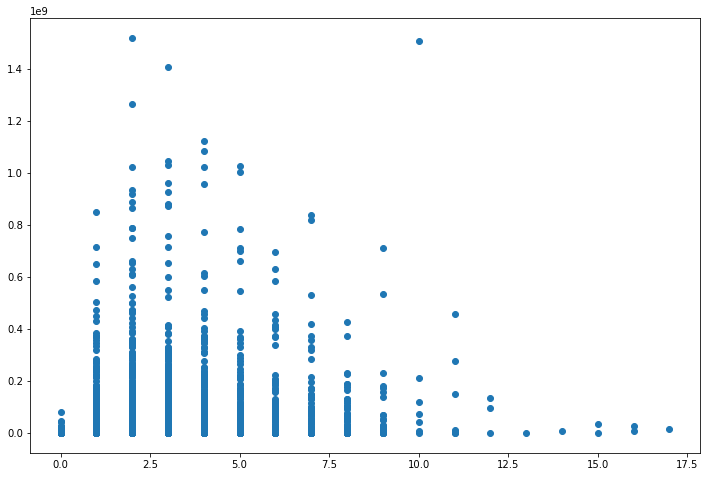

In [907]:
plt.figure(figsize=(12,8))
plt.scatter("companies_count", "revenue", data=train)
plt.show()

In [908]:
checked_companies = []
for i, l in enumerate(train['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            train[colName] = pd.Series([1 if comp in x else 0 for x in train['list_of_companies']], index =list(range(1,3001)))


In [909]:
print(sum(train['isColumbia Pictures Corporation']))
top_20_comp_pair

61


[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30)]

In [910]:
train = train.drop(['production_companies'], axis=1)
train = train.drop(['list_of_companies'], axis=1)
train = train.drop(['companies_count'], axis=1)

In [911]:
train

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,isColumbia Pictures Corporation,isTriStar Pictures,isColumbia Pictures,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,0,0,0,0,0,0,0,0,0,0
2,4.000000e+07,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,0,0,0,0,0,0,0,0,0,0
3,3.300000e+06,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,1.200000e+06,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,0,0,0,0,0,0,0,0,0,0
5,3.142419e+07,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,"[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...",...,0,0,0,0,0,0,0,0,0,0
2997,3.142419e+07,3.727996,"[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...",...,0,0,0,0,0,0,0,0,0,0
2998,6.500000e+07,14.482345,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...",...,0,0,0,0,0,0,0,0,0,0


isWarner Bros.


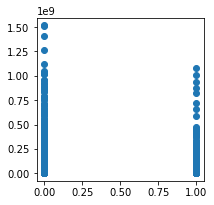

isUniversal Pictures


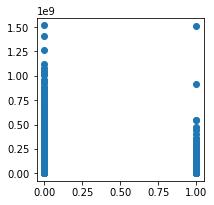

isParamount Pictures


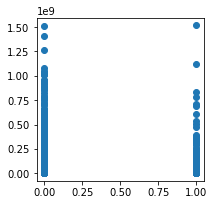

isTwentieth Century Fox Film Corporation


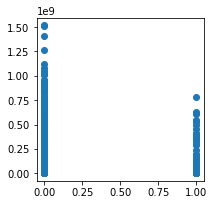

isColumbia Pictures


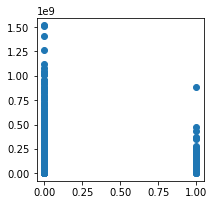

isMetro-Goldwyn-Mayer (MGM)


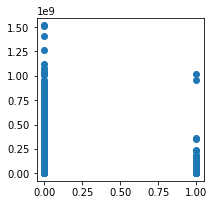

isNew Line Cinema


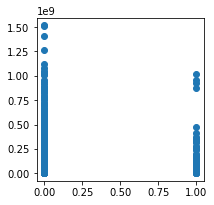

isTouchstone Pictures


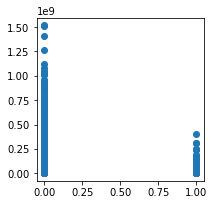

isWalt Disney Pictures


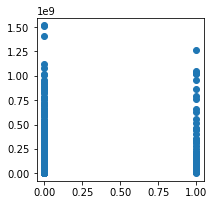

isColumbia Pictures Corporation


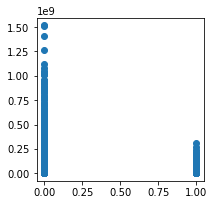

isTriStar Pictures


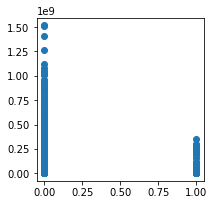

isRelativity Media


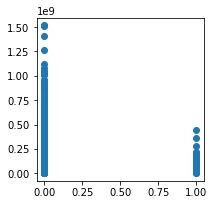

isCanal+


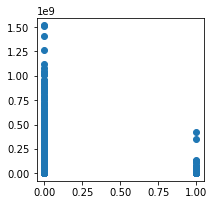

isUnited Artists


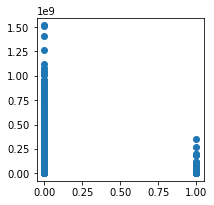

isMiramax Films


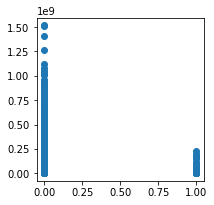

isVillage Roadshow Pictures


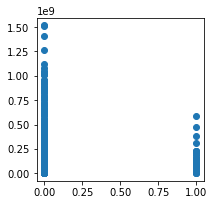

isRegency Enterprises


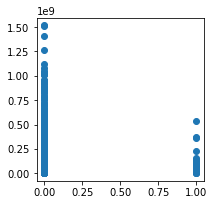

isBBC Films


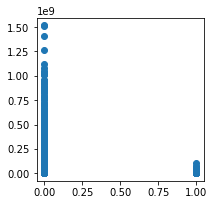

isDune Entertainment


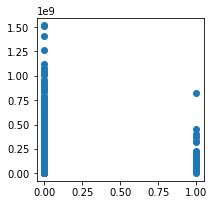

isWorking Title Films


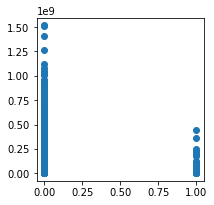

In [912]:
for comp in top_20_comp:
    col = 'is' + comp
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(col, "revenue", data=train)
    plt.show()

PRODUCTION COUNTRIES

In [913]:
train[['production_countries', 'is_english']]
train = train.drop(['production_countries'], axis=1)

RELEASE DATE

In [914]:
date = '01/02/93'
dmy = date.split('/')
integer_map = map(int, dmy)
dmy_int = list(integer_map)
dmy_int

[1, 2, 93]

In [915]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 21:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))

In [916]:
train['release_date'] = train['release_date'].apply(lambda x: x.split('/'))

In [917]:
train['release_day'] = pd.Series([x[1] for x in train['release_date']], index =list(range(1,3001)))
train['release_day'] = train['release_day'].astype(int)
train['release_month'] = pd.Series([x[0] for x in train['release_date']], index =list(range(1,3001)))
train['release_month'] = train['release_month'].astype(int)
train['release_year'] = pd.Series([x[2] for x in train['release_date']], index =list(range(1,3001)))
train['release_year'] = train['release_year'].astype(int)
train.info()
train = train.drop(['release_date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   budget                                    3000 non-null   float64
 1   popularity                                3000 non-null   float64
 2   release_date                              3000 non-null   object 
 3   runtime                                   2998 non-null   float64
 4   spoken_languages                          3000 non-null   object 
 5   status                                    3000 non-null   object 
 6   tagline                                   2403 non-null   object 
 7   title                                     3000 non-null   object 
 8   Keywords                                  3000 non-null   object 
 9   cast                                      3000 non-null   object 
 10  crew                                

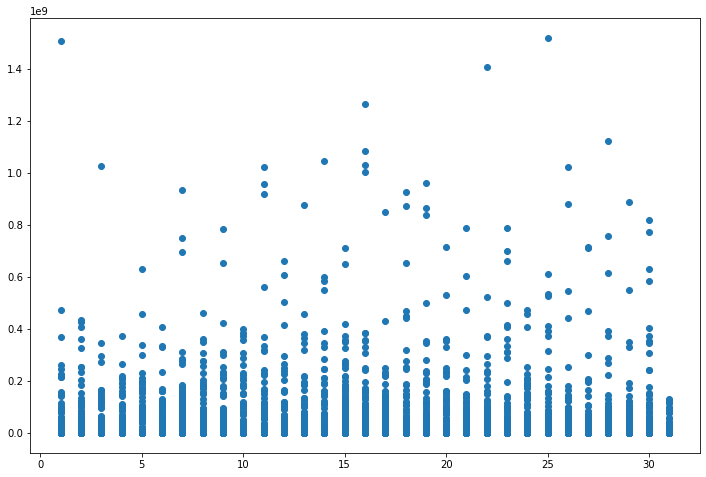

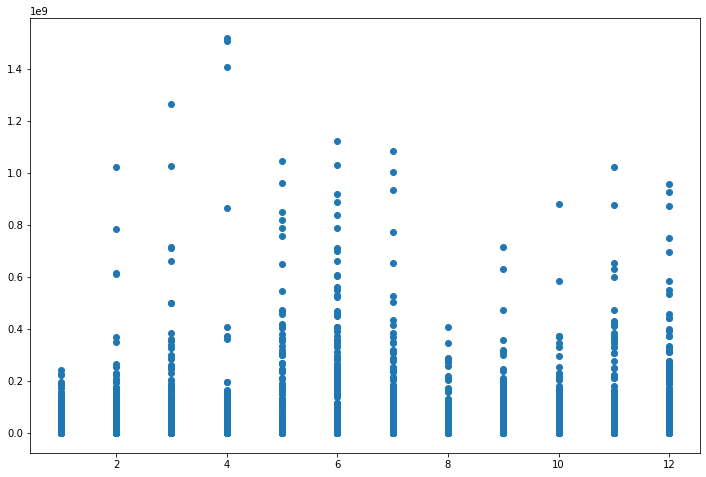

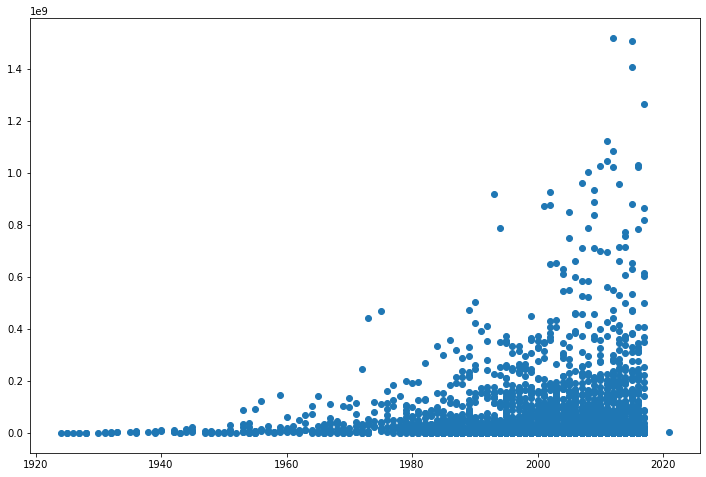

In [918]:
plt.figure(figsize=(12,8))
plt.scatter("release_day", "revenue", data=train)
plt.show()
plt.figure(figsize=(12,8))
plt.scatter("release_month", "revenue", data=train)
plt.show()
plt.figure(figsize=(12,8))
plt.scatter("release_year", "revenue", data=train)
plt.show()

In [919]:
train

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",...,0,0,0,0,0,0,0,20,2,2015
2,4.000000e+07,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",...,0,0,0,0,0,0,0,6,8,2004
3,3.300000e+06,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",...,0,0,0,0,0,0,0,10,10,2014
4,1.200000e+06,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",...,0,0,0,0,0,0,0,9,3,2012
5,3.142419e+07,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",...,0,0,0,0,0,0,0,5,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",...,0,0,0,0,0,0,0,22,4,1994
2997,3.142419e+07,3.727996,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",...,0,0,0,0,0,0,0,28,3,2013
2998,6.500000e+07,14.482345,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",...,0,0,0,0,0,0,0,11,10,1996


RUNTIME

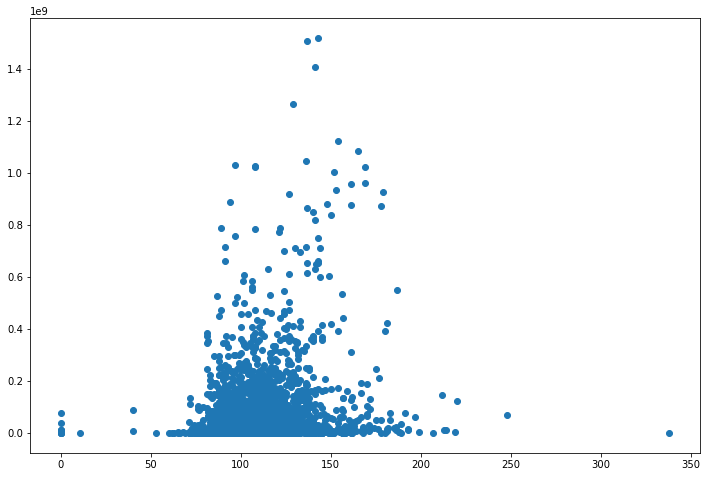

In [920]:
plt.figure(figsize=(12,8))
plt.scatter("runtime", "revenue", data=train)
plt.show()

In [921]:
train[pd.isna(train['runtime'])]

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1336,6.000000e+06,0.292296,NaN,[],Released,NaN,Королёв,[],"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",...,0,0,0,0,0,0,0,29,10,2007
2303,3.142419e+07,0.002229,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",[],...,0,0,0,0,0,0,0,14,3,1996


In [922]:
train.iloc[2302, train.columns.get_loc('runtime')] = 90
train.iloc[1335, train.columns.get_loc('runtime')] = 130

SPOKEN LANGUAGES

In [923]:
train = train.drop(['spoken_languages'], axis=1)
train

,budget,popularity,runtime,status,tagline,title,Keywords,cast,crew,revenue,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,...,0,0,0,0,0,0,0,20,2,2015
2,4.000000e+07,8.248895,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,...,0,0,0,0,0,0,0,6,8,2004
3,3.300000e+06,64.299990,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,...,0,0,0,0,0,0,0,10,10,2014
4,1.200000e+06,3.174936,122.0,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,...,0,0,0,0,0,0,0,9,3,2012
5,3.142419e+07,1.148070,118.0,Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,...,0,0,0,0,0,0,0,5,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,...,0,0,0,0,0,0,0,22,4,1994
2997,3.142419e+07,3.727996,102.0,Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,...,0,0,0,0,0,0,0,28,3,2013
2998,6.500000e+07,14.482345,120.0,Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,...,0,0,0,0,0,0,0,11,10,1996


STATUS

In [924]:
for i,e in enumerate(train['status']):
    if(e!='Released'):
        print (i,e)

609 Rumored
1007 Rumored
1216 Rumored
1618 Rumored


In [925]:
train.iloc[609]#vabbè

budget                                                                        31424185.225012
popularity                                                                           5.121309
runtime                                                                                  71.0
status                                                                                Rumored
tagline                                     It Will Take All Her Magic to Rescue Her Friends!
title                                          The Swan Princess: Escape from Castle Mountain
Keywords                                    [{'id': 3071, 'name': 'prince'}, {'id': 4456, ...
cast                                        [{'cast_id': 2, 'character': 'Odette (voice)',...
crew                                        [{'credit_id': '52fe488bc3a36847f816cfd3', 'de...
revenue                                                                                273644
logRevenue                                                  

In [926]:
train = train.drop(['status'], axis=1)
train

,budget,popularity,runtime,tagline,title,Keywords,cast,crew,revenue,logRevenue,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,...,0,0,0,0,0,0,0,20,2,2015
2,4.000000e+07,8.248895,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,...,0,0,0,0,0,0,0,6,8,2004
3,3.300000e+06,64.299990,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,...,0,0,0,0,0,0,0,10,10,2014
4,1.200000e+06,3.174936,122.0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,...,0,0,0,0,0,0,0,9,3,2012
5,3.142419e+07,1.148070,118.0,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,...,0,0,0,0,0,0,0,5,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,...,0,0,0,0,0,0,0,22,4,1994
2997,3.142419e+07,3.727996,102.0,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,...,0,0,0,0,0,0,0,28,3,2013
2998,6.500000e+07,14.482345,120.0,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,...,0,0,0,0,0,0,0,11,10,1996


TAGLINE

In [927]:
train['hasTagline'] = train['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
train = train.drop(['tagline'], axis=1)
train

,budget,popularity,runtime,title,Keywords,cast,crew,revenue,logRevenue,has_collection,...,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,...,0,0,0,0,0,0,20,2,2015,1
2,4.000000e+07,8.248895,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,...,0,0,0,0,0,0,6,8,2004,1
3,3.300000e+06,64.299990,105.0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,...,0,0,0,0,0,0,10,10,2014,1
4,1.200000e+06,3.174936,122.0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,...,0,0,0,0,0,0,9,3,2012,0
5,3.142419e+07,1.148070,118.0,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,...,0,0,0,0,0,0,5,2,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,...,0,0,0,0,0,0,22,4,1994,1
2997,3.142419e+07,3.727996,102.0,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,...,0,0,0,0,0,0,28,3,2013,0
2998,6.500000e+07,14.482345,120.0,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,...,0,0,0,0,0,0,11,10,1996,1


TITLE

In [928]:
train = train.drop(['title'], axis=1)
train

,budget,popularity,runtime,Keywords,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,...,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,...,0,0,0,0,0,0,20,2,2015,1
2,4.000000e+07,8.248895,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,...,0,0,0,0,0,0,6,8,2004,1
3,3.300000e+06,64.299990,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,...,0,0,0,0,0,0,10,10,2014,1
4,1.200000e+06,3.174936,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,...,0,0,0,0,0,0,9,3,2012,0
5,3.142419e+07,1.148070,118.0,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,...,0,0,0,0,0,0,5,2,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,1,...,0,0,0,0,0,0,22,4,1994,1
2997,3.142419e+07,3.727996,102.0,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,1,...,0,0,0,0,0,0,28,3,2013,0
2998,6.500000e+07,14.482345,120.0,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,0,...,0,0,0,0,0,0,11,10,1996,1


KEYWORDS

In [929]:
for i, e in enumerate(train['Keywords']):
    print (i)
    for comp in e:
        print(comp['name'])

0
time travel
sequel
hot tub
duringcreditsstinger
1
coronation
duty
marriage
falling in love
2
jazz
obsession
conservatory
music teacher
new york city
violence
montage
drummer
public humiliation
jazz band
young adult
music school
3
mystery
bollywood
police corruption
crime
india
missing husband
nerve gas
4
5
6
7
journalism
translation
television
manipulation of the media
iraq
reporter
woman director
8
island
pirate gang
puppet
treasure hunt
9
mockumentary
folk singer
10
underdog
philadelphia
transporter
italo-american
fight
love of one's life
publicity
boxer
independence
boxing match
training
lovers
surprise
world champion
amateur
victory
11
nerd
vacation
farce
jock
frame up
defector
12
male nudity
female nudity
adultery
parent child relationship
midlife crisis
coming out
first time
camcorder
virgin
nudity
film maker
estate agent
satire
loneliness
dark comedy
suburbia
coming of age
marijuana
exercise
bittersweet
affair
13
baseball bat
widow
recording contract
recording studio
russian m

righteous rage
229
france
revolution
biography
president
history
230
paris
london england
new york
jules verne
san francisco
istanbul
hot air balloon
journey round the world
231
independent film
232
233
woman director
234
based on novel
river
snake
expedition
world war i
biography
amazon
tribe
jungle
explorer
journey
1920s
mysterious lands
235
parent child relationship
cuddle rabbit
children
236
female nudity
brothel
vampire
private investigator
born again christian
televangelist
237
politics
surrealism
business
hunt
high society
class relations
absurdism
238
corruption
fortune teller
money transfer
money laundering
pottery
afterlife
spiritism
239
music rehearsal
fraternity initiation
television broadcast
white male pretending to be black
sorority party
push ups
240
detective
surgeon
stripper
profanity
murder
brutality
buddy
241
242
artificial intelligence
card game
hacker
virtual reality
computer
family holiday
243
baltimore
thanksgiving
family clan
family conflict
generations conflic

hostility
class
rivalry
430
college
rivalry
friendship between men
431
amnesia
chaos theory
blackout
time travel
flashback
432
suspense
woman director
433
kidnapping
pistol
434
nasa
texas
dream
fbi
bankrupt
peasant
earth
farm
insanity
rocket
life's dream
spinner
space
independent film
astronaut
family
435
wilderness
friendship
survival
coming of age
summer
nature
guide
tough love
436
indiana
education
wilderness
biography
step mother
illness
abraham lincoln
437
spy
hero
queen
intelligence
coronation
funeral
secret agent
queen elisabeth ii
weapon
spoof
explosion
agent
pen
duringcreditsstinger
438
love triangle
poem
jealousy
age difference
baseball
trainer
sports team
pitcher
stadium
flirt
home run
sport
minor leagues
439
brazilian
440
based on graphic novel
ancient greece
duringcreditsstinger
sea battle
hand to hand combat
minions
naval warfare
3d
441
442
circus
lion
eccentric
robot
443
suspense
independent film
444
based on novel
female protagonist
post world war ii
woman director
445


vengeful
jesuit priest
gnosticism
occultism
661
hairdresser
infidelity
breast cancer
grieving widower
wedding
chance meeting
woman director
seaside town
lemon tree grove
662
sport
roller derby
duringcreditsstinger
woman director
663
radiation
ukraine
nuclear radiation
tourist
nuclear power plant
stranded
deserted town
pripyat
664
665
independent film
stuck in elevator
bisexual woman
book signing
killed with hairpin
going into labor
talking in sleep
oblivious to woman who loves him
best friends in love
annoying little sister
lisp
wet dream
666
elves
dwarves
orcs
hobbit
dragon
wizard
sword and sorcery
667
668
669
baby
midlife crisis
confidence
aging
daughter
mother daughter relationship
pregnancy
contraception
gynecologist
670
usa
prison
rebel
prisoner
difficult childhood
bird
alcatraz
ornithology
biography
solitary confinement
warden
671
suicide attempt
drama
love
bollywood
672
california
sequel
murder
based on tv series
private detective
high school reunion
duringcreditsstinger
crowdfu

fame
831
love of one's life
neighbor
832
himalaya
martial arts
dc comics
crime fighter
secret identity
undercover
hero
loss of father
society
gotham city
vigilante
superhero
based on comic
rivalry
tragic hero
ninja
good vs evil
crime
super powers
haunted by the past
evil doctor
escapade
master villain
fighting crime
unfulfillment
love and romance
unfulfilled love
833
robbery
santa claus
armor
disguise
834
classroom
college
teacher
diner
loss of job
economics
yard sale
cell phone
scooter
back to school
835
germany
eastern germany
cold war
border
czechoslovakia
836
woman director
837
future
chase
post-apocalyptic
dystopia
australia
rescue
survival
on the run
convoy
peak oil
dark future
838
detective
jealousy
dying and death
deceived wife
lovers
investigation
observer
super powers
839
840
hijacking
based on true story
airplane hijacking
air hostesses
841
sister sister relationship
wealth
family
woman director
riches to rags
842
843
3d
khumba
844
transylvania
based on novel
monster
castle


duringcreditsstinger
1049
based on novel
sniper
investigation
police
quarry
1050
bowling
hostage
sphinx
training
insane asylum
tools
frankenstein
casanova
superhero
based on comic
independent film
comedy
spoof
skull
shovel
disco
superhero spoof
invisible man
dark horse comics
invisibility
rajah
bowling ball
spleen
evil genius
1051
based on novel
waitress
passion
love
advertising executive
1052
journalist
museum
hostage drama
independent film
1053
joke
freak
absurdism
1054
interracial relationship
dead father
reference to bob dylan
biracial
bedtime story
unmarried couple
medical illustrator
disguised voice
reference to huckleberry finn
student protest
sonogram
expectant grandmother
dead parents
testicles
1055
1056
virtual reality
dystopia
moral conflict
computer
loneliness
water shortage
teacher
1057
taxi
restaurant
zoo
penguin
ex husband
little boy
zookeeper
doorman
ride
bird hatching
aftercreditsstinger
duringcreditsstinger
1058
suicide
diary
friendship
high school
dark comedy
clique


first time
virgin
1232
independent film
woman director
1233
stand-up comedy
1234
germany
prison
music record
adultery
country music
guitar
loss of brother
concert
marriage
single
accident
1960s
1235
new york
infidelity
ex-girlfriend
loyalty
trip
marriage
party
business
writer
trust
attraction
boyfriend
temptation
woman director
1236
court case
gun rampage
firearm
jury
suspense
person running amok
lobbyist
1237
robbery
detective
sequel
jewel thief
pink panther
1238
sex
lake
nudity
college
victim
lodge
vacation
woods
gore
homicidal
marijuana
blood
disease
illness
virus
locals
1239
cat
virgin
narration
wheelchair
graduation
sexual arousal
judaism
power outage
intimate
catholic church
sexual awakening
male virgin
woman crying
sponge bath
catholic priest
jealous husband
iron lung
sex surrogate
polio
crying woman
polio victim
jewish man
true life character
gurney
sexual pleasure
pity sex
jewish convert
handicap sex
sexual exploration
naked woman
thrift store
1240
1241
bar
billard
talent
hust

american flag
multiple stabbings
violence
person on fire
cell phone
psycho
1412
kidnapping
bunker
paranoia
basement
survivalist
apocalypse
car accident
captive
1413
photographer
independent film
blind
woman director
blind man
1414
workaholic
dogsitter
1415
woman director
1416
baseball
sport
historical figure
new york yankees
1417
cia
assassin
running
white house
usa president
bodyguard
stalking
election
apartment
secret service
secret service agent
1418
female nudity
bathroom
sex
blackmail
chauffeur
first time
pedophilia
nudity
bedroom
bed
disappointment
revelation
kiss
pubic hair
independent film
lingerie
sexual attraction
statutory rape
maid
lust
kissing
teenage boy
desire
legs
sensuality
sexual desire
fatal attraction
stripping
promiscuous woman
stockings
older woman younger man relationship
sexual awakening
faked death
joy
exhibitionism
housemaid
pleasure
exhibitionist
sex lesson
1419
resistance
independent film
1420
1421
environment
woman director
1422
medicine
sandstorm
army
doct

leonard bernstein
watergate scandal
car dealing
black panthers
hijacking
loan credit
mental breakdown
marriage
unsociability
delusion
revenge
suicide mission
divorce
humiliation
social issues
1618
woman director
1619
upper class
brother brother relationship
scotland
poetry
based on novel
mentor
becoming an adult
professor
literature
intellectually gifted
plagiarism
literature competition
private school
manuscript
seclusion
pulitzer prize
dying and death
idol
friendship
unsociability
high school
scholarship
father figure
1620
camelot
knight
king arthur
excalibur
knights of the round table
1621
angel
hell
prayer
shooting
singer
church
gambler
1622
1623
italian
jewelry
safe
night club
burglary
newspaper stand
rough
silhouetted dancer
cigarette lighter
tuberculosis
cleaners
1624
hades
musical
peasant
animation
aftercreditsstinger
olympus
hercules
1625
car race
dystopia
matter of life and death
prison guard
car set on fire
escape from prison
exploding building
vehicle combat
car crash
viole

drink
madness
anarchy
eating
reading
silence
magic realism
threat
errand boy
metronome
bonfire
aunt nephew relationship
recording
oven
military
wood chopping
solar system
ex-husband ex-wife relationship
hospital bed
uncle nephew relationship
coal
march
graveyard
jumping on a bed
tyrant
listening to music
chief of police
woman director
catastrophe
plague
drunkenness
furnace
mailroom
messiah
stove
cosmos
nightshirt
piano
statue
messenger
shoemaker
train tracks
traveling circus
contemplative cinema
sarkad hungary
restraining order
hospital visit
fleeing
musical tones
musical notes
errand
death of uncle
strange
russian occupation
1794
sport
coach
lawyer
wrestling coach
1795
venice
suicide
male nudity
female nudity
hotel
screenwriter
switzerland
composer
conductor
vacation
alps
old friends
1796
ship
hijacking
somalia
fisherman
blood
poverty
pirate
terrorism
commando
hijack
cargo ship
ship captain
ship hijacking
somali
commando unit
1797
prison
based on novel
brother sister relationship
sata

independent film
emergency doctor
2024
female nudity
prostitute
horse race
heart
strip club
electric shock
godzilla
sequel
tourette syndrome
gang
shootout
public sex
cigarette smoking
mansion
electrocution
foot chase
surgery
taser
duringcreditsstinger
flashback
absurdism
ultraviolence
2025
2026
rebel
sword
wilderness
daughter
ninja
soldier
gaijin
2027
college
friendship
teenager
relationship
2028
transporter
jealousy
violent husband
paranoia
boxer
biography
fistfight
broken nose
sport
domestic violence
extreme violence
over-the-hill fighter
2029
faithlessness
puppet
killer toys
toy comes to life
2030
transvestism
transylvania
sex
marriage proposal
time warp
castle
musical
undressing
motorcycle
rock 'n' roll
cult classic
audience participation
dark and stormy night
creator creation relationship
lips
2031
dance
ragtime
concert tour
2032
italy
nurse
love letter
officer
priest
escape
hospital
best friend
pre-code
air raid
ambulance driver
battle of the isonzo
air attack
2033
sex
kidnapping

barcelona spain
transvestism
transsexuality
drug abuse
transplantation
madrid
birthday
autograph
actress
friend
2214
southern usa
blues
military service
independent film
2215
baby
godmother
death of a friend
romantic comedy
parenthood
orphan
godfather
co-parenting
legal guardian
2216
sex
depression
existentialism
2217
infidelity
revenge
unfaithful boyfriend
woman
sitting on a toilet
public toilet
marital infidelity
laxative
unfaithful husband
2218
california
detective
based on novel
dream
undercover
cocaine
brain
exam
future
test
dystopia
assignment
cyberpunk
drug
surveillance
totalitarian
corporation
substance
schizophrenic
condition
neo-noir
2219
dancing
mother
alcohol
sex
adultery
fight
nudity
sister
friendship
party
independent film
school
essex
teenager
theft
violence
apartment
estate
boyfriend
teenage rebellion
voyeur
woman director
aggressive
2220
2221
wine garden
wine
winzer
2222
vietnam veteran
pennsylvania
vietnam
party
escape
friend
viet cong
pittsburgh steelers
2223
tv star

2402
informant
jumping from a rooftop
surveillance footage
2403
black people
journalist
success
bad luck
broker
2404
based on novel
money laundering
ambulance
boston
massachusetts
bank manager
drug dealer
florist
flower shop
hold-up robbery
volunteer
stolen money
friends
car set on fire
boston garden
police chase
best friend
fenway park
2405
pornography
2406
gay
drug abuse
florida
fight
drug addiction
restaurant
drug dealer
high school
homosexuality
coming of age
african american
mother son relationship
lgbt
addict
black lgbt
2407
2408
man on the run
2409
diving
u.s. navy
2410
cheerleading
aftercreditsstinger
duringcreditsstinger
2411
paris
san francisco
vampire
plantation
pity
bite
fang vamp
2412
brother brother relationship
invasion
remake
guerrilla warfare
north korean
2413
based on novel
independent film
2414
rodeo
horse
doping
performance
love
cowboy
2415
brother sister relationship
autism
car garage
2416
female nudity
sex
disc jockey
infidelity
rain
architect
nudity
seduction
cak

future
dystopia
ensemble cast
duringcreditsstinger
century
woman director
1930s
2632
mars
future
astronaut
science
catastrophe
2633
brother sister relationship
innocence
serial killer
michael myers
2634
2635
serial killer
2636
angel
diner
religion
apocalypse
demon
desert
angels
2637
love triangle
male nudity
black humor
rape of a male
non statutory female on male rape
bizzare comedy
2638
high school
undercover cop
buddy comedy
aftercreditsstinger
duringcreditsstinger
2639
adultery
infidelity
secret
investigation
friendship
partner
love
friends
dilemma
cheating on partner
best friend
2640
comedian
interview
reporter
movie star
fianc√© fianc√©e relationship
2641
date
independent film
neighbor
mistaken identity
girl next door
2642
assassin
2643
fictional place
exotic island
shipwreck
cruise
volcano
e-mail
liana
daughter
turtle
author
talking animal
pirate
woman director
iguana
sea lion
2644
moon
asteroid
space marine
intelligence
buenos aires
space battle
dystopia
army
satire
spaceship
so

lone wolf
wizardry
royalty
barbarian
sword and sorcery
2826
puberty
first time
2827
american football
sport
dog
2828
–ª—é–±–æ–≤—å
–±–∏—Ç–≤–∞
–≤–æ–∏–Ω
2829
mutant
faith
soldier
2830
robbery
gun
loyalty
frustration
revenge
betrayal
independent film
coin
diner
lesbian
vulgarity
african american
crime
trust
poker game
criminal
dialogue driven
tantrum
rainstorm
broken glass
minimal cast
antique dealer
station wagon
2831
middle east
armor
kgb
test
error
engineer
army
2832
upper class
loss of mother
great britain
sadness
queen
monarchy
paparazzi
prime minister
headline
oscar award
dying and death
queen elisabeth ii
prince charles
buckingham palace
royal family
lady diana spencer
2833
holiday
tv ratings
comedy
scrooge
christmas carol
ghost
duringcreditsstinger
christmas
2834
age difference
ladykiller
woman director
2835
interracial marriage
wedding
duringcreditsstinger
2836
baseball
sport
based on true story
family relationships
2837
provence
magic
aunt
spiritualist
2838
sexual tension
period 

In [930]:
train['list_of_keywords'] = train['Keywords'].apply(lambda x: [comp['name'] for comp in x])

In [931]:
list_of_keywords = []
for l in train['list_of_keywords']:
    for key in l:
        list_of_keywords.append(key)

print(len(list_of_keywords))
unique_keywords = set(list_of_keywords)
print(len(unique_keywords))
top_50_keys_pair = Counter(list_of_keywords).most_common(50)
top_50_keys = []
for p in top_50_keys_pair:
    top_50_keys.append(p[0])
Counter(list_of_keywords).most_common(50)

21680
7400


[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53),
 ('drug', 52),
 ('prison', 50),
 ('musical', 49),
 ('high school', 49),
 ('los angeles', 48),
 ('new york', 47),
 ('family', 45),
 ('father son relationship', 44),
 ('kidnapping', 41),
 ('investigation', 41),
 ('wedding', 40),
 ('3d', 40),
 ('detective', 38),
 ('london england', 38),
 ('paris', 37),
 ('based on comic', 37),
 ('robbery', 36),
 ('based on true story', 35),
 ('dying and death', 34),
 ('escape', 34),
 ('alien', 34),
 ('brother brother relationship', 34),
 ('prostitute', 34),
 ('suicide', 33),
 ('rape', 33),
 ('corruption', 33),
 ('death', 32),
 ('superhero', 32),
 (

In [932]:
train['isInTop50Keywords'] = pd.Series([1 if list(set(x) & set(top_50_keys)) != [] else 0 for x in train['list_of_keywords']], index =list(range(1,3001)))

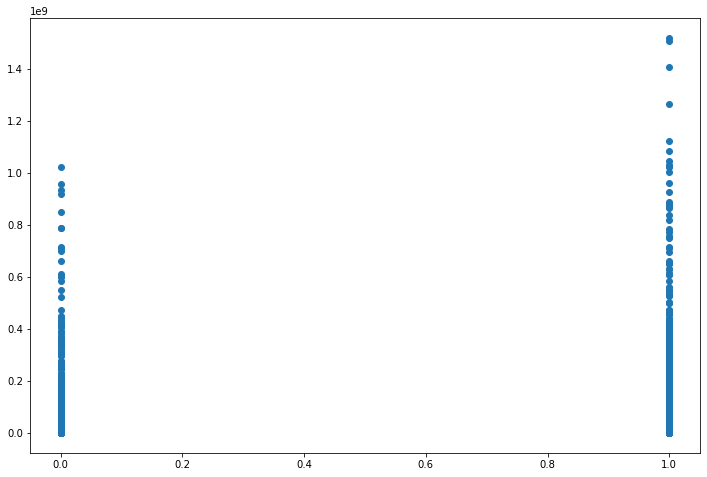

In [933]:
plt.figure(figsize=(12,8))
plt.scatter("isInTop50Keywords", "revenue", data=train)
plt.show()

In [934]:
train = train.drop(['isInTop50Keywords'], axis=1)

In [935]:
train['keywordsCount'] = train['list_of_keywords'].apply(lambda x: len(x))

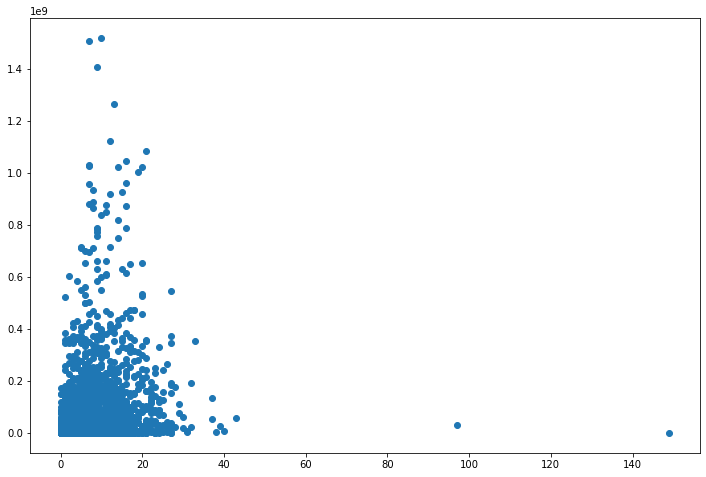

In [936]:
plt.figure(figsize=(12,8))
plt.scatter("keywordsCount", "revenue", data=train)
plt.show()

In [937]:
train = train.drop(['Keywords'], axis=1)
train = train.drop(['list_of_keywords'], axis=1)

In [938]:
train

,budget,popularity,runtime,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,genre_count,...,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline,keywordsCount
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,1,...,0,0,0,0,0,20,2,2015,1,4
2,4.000000e+07,8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,4,...,0,0,0,0,0,6,8,2004,1,4
3,3.300000e+06,64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,1,...,0,0,0,0,0,10,10,2014,1,12
4,1.200000e+06,3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,2,...,0,0,0,0,0,9,3,2012,0,7
5,3.142419e+07,1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,2,...,0,0,0,0,0,5,2,2009,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,1,2,...,0,0,0,0,0,22,4,1994,1,19
2997,3.142419e+07,3.727996,102.0,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,1,2,...,0,0,0,0,0,28,3,2013,0,6
2998,6.500000e+07,14.482345,120.0,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,0,4,...,0,0,0,0,0,11,10,1996,1,14


CAST

In [939]:
for i, e in enumerate(train['cast']):
    for act in e:
        print(act['name'], act['gender'])

Rob Corddry 2
Craig Robinson 2
Clark Duke 2
Adam Scott 2
Chevy Chase 2
Gillian Jacobs 1
Bianca Haase 1
Collette Wolfe 1
Kumail Nanjiani 2
Kellee Stewart 1
Josh Heald 2
Gretchen Koerner 0
Lisa Loeb 1
Jessica Williams 1
Bruce Buffer 0
Mariana Paola Vicente 0
Christian Slater 2
Jason Jones 0
Olivia Jordan 0
Christine Bently 1
Stacey Asaro 0
John Cusack 2
Adam Herschman 2
Kisha Sierra 1
Anne Hathaway 1
Julie Andrews 1
H√©ctor Elizondo 2
John Rhys-Davies 2
Heather Matarazzo 1
Chris Pine 2
Callum Blue 2
Larry Miller 2
Raven-Symon√© 1
Kathleen Marshall 1
Caroline Goodall 1
Lorraine Nicholson 1
Shannon Wilcox 1
Greg Lewis 2
Abigail Breslin 1
Paul Vogt 2
Joseph Leo Bwarie 2
Hope Alexander-Willis 1
Rowan Joseph 2
Jeffrey Scott Jensen 2
Miles Teller 2
J.K. Simmons 2
Melissa Benoist 1
Austin Stowell 2
Jayson Blair 2
Kavita Patil 1
Paul Reiser 2
Nate Lang 0
Chris Mulkey 2
Damon Gupton 2
Suanne Spoke 0
Max Kasch 2
Charlie Ian 0
Kofi Siriboe 2
C.J. Vana 0
Tarik Lowe 0
Tyler Kimball 0
Rogelio Douglas 

Brock Peters 2
Warren Oates 2
Ben Johnson 2
R. G. Armstrong 2
Slim Pickens 2
Karl Swenson 2
Michael Pate 2
Jon Roberts 0
Jorge Ayala 0
Mickey Munday 0
Toni Mooney 0
Nelson Andreu 0
Al Sunshine 0
Paul Newman 2
George Kennedy 2
Luke Askew 2
Morgan Woodward 0
Harry Dean Stanton 2
Dennis Hopper 2
Lou Antonio 2
Robert Drivas 0
Strother Martin 2
Jo Van Fleet 1
Clifton James 2
Marc Cavell 0
Richard Davalos 2
Robert Donner 2
J. D. Cannon 2
Joe Don Baker 2
James Gammon 2
Chuck Hicks 2
Rance Howard 2
James Jeter 2
Joy Harmon 0
Anthony Zerbe 2
Warren Finnerty 2
John McLiam 2
Wayne Rogers 2
Charles Tyner 2
Ralph Waite 2
Buck Kartalian 2
Kim Kahana 0
Donn Pearce 2
John Pearce 0
Rush Williams 2
Madonna 1
Rupert Everett 2
Benjamin Bratt 2
Malcolm Stumpf 0
Josef Sommer 2
Suzanne Krull 1
Linda Larkin 1
Illeana Douglas 1
Michael Vartan 2
Lynn Redgrave 1
Neil Patrick Harris 2
Morgan Freeman 2
Diane Keaton 1
Carrie Preston 1
Cynthia Nixon 1
Alysia Reiner 1
Josh Pais 2
Claire van der Boom 1
Sterling Jerins

Joseph Mascolo 2
Tony King 2
John Fiedler 2
Carol Locatell 0
Suzee Pai 1
Sheri Moon Zombie 1
Meg Foster 1
Malcolm McDowell 2
Ginger Lynn Allen 1
Daniel Roebuck 2
Lawrence Hilton-Jacobs 0
Jeff Daniel Phillips 0
Jane Carr 0
Judy Geeson 1
Kevin Jackson 2
Richard Brake 2
Pancho Moler 2
David Ury 0
Lew Temple 2
Torsten Voges 2
E.G. Daily 1
Tracey Walter 2
Andrea Dora 1
Michael 'Red Bone' Alcott 0
Esperanza America 1
Devin Sidell 1
Gabriel Pimentel 0
Jermain Hollman 2
W.F. Bell 2
Butch Von Dreaux 2
Caleb West 2
Alyssa Perper 1
Megan Albertus 1
Kara Gibson 1
Sandra Rosko 1
Shawn Rougeron 1
Kurt Russell 2
Scott Speedman 2
Michael Michele 1
Brendan Gleeson 2
Ving Rhames 2
Lolita Davidovich 1
Dash Mihok 2
Kurupt 2
Master P 2
Marin Hinkle 1
Jonathan Banks 2
Khandi Alexander 1
Dana Lee 2
Chapman Russell Way 0
Jamison Jones 2
William Utay 2
Eloy Casados 2
Steve Martin 2
Claire Danes 1
Jason Schwartzman 2
Bridgette Wilson 0
Frances Conroy 1
Sam Bottoms 2
Rebecca Pidgeon 1
Samantha Shelton 1
Gina Doc

Sarah McLeod 1
Marton Csokas 2
Alan Howard 2
Noel Appleby 0
Megan Edwards 0
Michael Elsworth 2
Mark Ferguson 2
Brent McIntyre 0
Eddie Griffin 2
Chris Kattan 2
Denise Richards 1
Aunjanue Ellis 1
Chi McBride 2
Neil Patrick Harris 2
Dave Chappelle 2
Gary Anthony Williams 0
Billy Dee Williams 0
Robert Townsend 2
James Brown 2
Adrien Brody 2
Tim Robbins 2
Xu Fan 1
Chen Dao-Ming 2
Alec Su 2
Zhang Hanyu 2
Alfred Hsing 0
Duan Yihong 0
Zhang Guoli 0
Mo Zhang 0
Li Xuejian 0
Wang Zi Wen 1
Lu Zhong 0
Zhang Guo-Qiang 2
Chun Du 0
Qiao Zhenyu 2
Feng Yuanzheng 0
Tim Allen 2
John Travolta 2
Martin Lawrence 2
William H. Macy 2
Ray Liotta 2
Marisa Tomei 1
John C. McGinley 2
M.C. Gainey 2
Jill Hennessy 1
Dominic Janes 2
Tichina Arnold 1
Stephen Tobolowsky 2
Jason Sklar 2
Randy Sklar 2
Drew Sidora 1
Jonathan Rau 2
Peter Fonda 2
Julian Sands 2
Sherilyn Fenn 1
Bill Paxton 2
Kurtwood Smith 2
Art Garfunkel 2
Nicolette Scorsese 0
Meg Register 0
Bryan Smith 0
Marla Levine 0
Kim Lentz 0
Lloyd T. Williams 0
Carl M

Shelley Winters 1
Harold Gould 2
Roy Jenson 2
Strother Martin 2
Martin West 0
Jacqueline deWit 1
Eugene Iglesias 0
Milla Jovovich 1
Brian Krause 2
Lisa Pelikan 1
Courtney Barilla 1
Garette Ratliff Henson 2
Brian Blain 0
Emma James 0
Jackson Barton 0
Nana Coburn 0
Peter Hehir 0
Alexander Petersons 0
John Mann 2
Wayne Pygram 2
John Dicks 0
Gus Mercurio 2
Rebel Wilson 1
Xavier Samuel 2
Olivia Newton-John 1
Kris Marshall 2
Kevin Bishop 2
Laura Brent 0
Tim Draxl 2
Solveig Walking 0
David Sullivan 0
Elizabeth Debicki 1
Jonathan Biggins 2
Oliver Torr 0
Steve Le Marquand 2
Angela Bishop 0
Alan Cinis 2
Paul Walker 2
Vin Diesel 2
Michelle Rodriguez 1
Jordana Brewster 1
Rick Yune 2
Chad Lindberg 2
Johnny Strong 2
Ted Levine 2
Matt Schulze 2
Thom Barry 2
Ja Rule 2
Vyto Ruginis 2
Stanton Rutledge 0
Noel Gugliemi 2
RJ de Vera 0
Beau Holden 2
Reggie Lee 2
David Douglas 0
Peter 'Navy' Tuiasosopo 2
F. Valentino Morales 0
Neal H. Moritz 2
Rob Cohen 2
Kevin Smith 2
Doria Clare Anselmo 0
Glenn K. Ota 0
Mi

Zuleikha Robinson 1
Omar Sharif 0
Adam Alexi-Malle 2
Louise Lombard 1
Silas Carson 2
Harsh Nayyar 2
C. Thomas Howell 2
J.K. Simmons 2
Adoni Maropis 2
Joshua Wolf Coleman 0
Sa√Ød Taghmaoui 0
Victor Talmadge 0
Peter Mensah 2
Franky Mwangi 0
Floyd Red Crow Westerman 0
Tom Everett Scott 2
Julie Delpy 1
Vince Vieluf 2
Julie Bowen 1
Phil Buckman 2
Pierre Cosso 2
Thierry Lhermitte 2
Tom Novembre 2
Maria Machado 1
Ben Salem Bouabdallah 2
Charles Maquignon 0
Chris Bearne 2
Alan McKenna 0
Herv√© Sogne 2
Christian Magnani 2
Anthony Waller 2
Jean-Claude Deret 0
David F. Friedman 2
Pieter Riemens 2
Pierre Bodry 2
Serge Basso 0
Roy Scheider 2
Robert Shaw 2
Richard Dreyfuss 2
Lorraine Gary 1
Murray Hamilton 0
Carl Gottlieb 2
Jeffrey Kramer 2
Susan Backlinie 1
Jonathan Filley 0
Chris Rebello 2
Jay Mello 2
Lee Fierro 0
Jeffrey Voorhees 0
Craig Kingsbury 0
Robert Nevin 0
Ted Grossman 0
Peter Benchley 2
Dorothy Fielding 1
Steven Spielberg 2
Denise Cheshire 0
Fritzi Jane Courtney 0
David Engelbach 2
Belle

David Bailie 2
Kwame Kwei-Armah 0
Ramon Tikaram 2
Christopher Adamson 2
Kevin Heffernan 2
Jay Chandrasekhar 2
Paul Soter 2
Erik Stolhanske 2
Tanja Reichert 1
Bill Paxton 2
Brittany Daniel 1
Jordan Ladd 1
Nat Faxon 2
Julio Bekhor 0
Karolina Gruszka 1
Eddie Garcia 2
Armida Siguion-Reyna 0
Joey Paras 0
Soxy Topacio 0
Rez Cortez 2
Bibeth Orteza 0
Beverly Salviejo 0
Luz Valdez 1
Gardo Versoza 0
Jason Bateman 2
Kathryn Hahn 1
Rohan Chand 2
Philip Baker Hall 2
Allison Janney 1
Ben Falcone 2
Steve Witting 0
Beth Grant 1
Patricia Belcher 1
Rachael Harris 1
Greg Cromer 0
Jason Clarke 2
Jake Gyllenhaal 2
Josh Brolin 2
John Hawkes 2
Sam Worthington 2
Robin Wright 1
Keira Knightley 1
Clive Standen 2
Emily Watson 0
Mia Goth 1
Michael Kelly 2
Martin Henderson 2
Elizabeth Debicki 1
Tom Goodman-Hill 2
Vanessa Kirby 1
Naoko Mori 1
Mark Derwin 2
Thomas M. Wright 0
Ingvar Eggert Sigur√∞sson 2
Ang Phula Sherpa 0
Charlotte B√∏ving 1
Pemba Sherpa 0
Amy Shindler 0
Simon Harrison 0
Chris Reilly 0
Tim Dantay 0


Vanessa Bell Calloway 1
David Boyd 2
Jodi Benson 1
Gino Conforti 2
Barbara Cook 1
Gary Imhoff 2
Charo 1
Gilbert Gottfried 2
Carol Channing 1
Will Ryan 2
June Foray 1
Kenneth Mars 2
Joe Lynch 0
Danny Mann 2
Loren Lester 2
Kendall Cunningham 0
Tawny Sunshine Glover 0
Michael Nunes 0
Hugh Grant 2
Andie MacDowell 1
James Fleet 2
Simon Callow 2
John Hannah 2
Kristin Scott Thomas 1
David Bower 2
Charlotte Coleman 1
Rowan Atkinson 2
Anna Chancellor 1
Timothy Walker 0
Sara Crowe 1
Ronald Herdman 0
Elspet Gray 0
Philip Voss 2
Rupert Vansittart 2
Nicola Walker 1
Struan Rodger 2
David Haig 2
Sophie Thompson 1
Corin Redgrave 2
Amanda Mealing 0
Anna Chancellor 1
Bernice Stegers 1
Robert Lang 2
Jeremy Kemp 2
Ken Drury 2
Struan Rodger 2
Polly Kemp 0
Joseph Gordon-Levitt 2
Jeff Daniels 2
Matthew Goode 2
Isla Fisher 1
Carla Gugino 1
Bruce McGill 2
Alberta Watson 1
Alex Borstein 1
Sergio Di Zio 2
David Huband 2
Greg Dunham 0
Morgan Kelly 2
Aaron Berg 0
Tinsel Korey 1
Suzanne Kelly 1
Brian Edward Roach 2

Joseph Moynihan 2
Gregory Peck 2
Hugh Marlowe 2
Gary Merrill 2
Millard Mitchell 2
Dean Jagger 0
Robert Arthur 2
Paul Stewart 2
John Kellogg 2
Robert Patten 2
Lee MacGregor 2
Sam Edwards 2
Roger Anderson 0
Lawrence Dobkin 0
Paul Picerni 2
Harry Lauter 0
Barry Jones 2
Don Gordon 2
Kenneth Tobey 2
Vikram 2
Trisha Krishnan 1
Vijayakumar 0
Delhi Ganesh 2
Kota Srinivasa Rao 2
Manorama 1
Vivek 0
N. S. Ramesh Khanna 0
Ponnambalam 0
Sumithra 0
Jon Hamm 2
Bill Paxton 2
Lake Bell 1
Suraj Sharma 2
Aasif Mandvi 2
Madhur Mittal 2
Pitobash 0
Alan Arkin 2
Bar Paly 0
Al Sapienza 2
Tzi Ma 2
Allyn Rachel 1
Ravi Naidu 2
Gabriela Lopez 1
Jesse Eisenberg 2
Mark Ruffalo 2
Woody Harrelson 2
M√©lanie Laurent 1
Isla Fisher 1
Dave Franco 2
Michael Caine 2
Morgan Freeman 2
Michael Kelly 2
Common 0
David Warshofsky 2
Jos√© Garcia 2
Jessica Lindsey 0
Caitriona Balfe 1
Stephanie Honor√© 1
Elias Koteas 2
Odessa Sykes 0
Justine Wachsberger 1
Nanako Matsushima 1
Song Seung-heon 2
Sawa Suzuki 0
Kirin Kiki 1
Kuno Becker 

Salvatore H. Tornabene 0
Kevin Dearie 0
Michael Badalucco 2
Charles Ferrara 0
Esteban Fernandez 0
George Fernandez 0
Charles Gunning 2
Dave Drinkx 0
David Darlow 2
Robert LaBrosse 0
Carl Rooney 0
Jack Harris 0
Jery Hewitt 0
Sam Raimi 2
John Schnauder Jr. 0
Zolly Levin 0
Joey Ancona 0
Bill Raye 0
William Preston Robertson 2
Frances McDormand 1
MIchael P. Cahill 0
Ewan McGregor 2
Ricky Gervais 2
Tim Curry 2
Jim Broadbent 2
Hugh Laurie 2
John Cleese 0
John Hurt 2
Pip Torrens 2
Rik Mayall 2
Olivia Williams 1
Jonathan Ross 2
Brian Lonsdale 2
Dan Roberts 2
Michael Schlingmann 0
Sharon Horgan 1
Ethan Hawke 2
Carmen Ejogo 1
Callum Keith Rennie 2
Stephen McHattie 2
Janet-Laine Green 1
Tony Nappo 2
Janine Theriault 1
Tony Nardi 2
Katie Boland 1
Dan Lett 0
Sophia Walker 0
Joe Condren 2
Kevin Hanchard 2
Drew Davis 2
Charles Officer 0
Leonardo DiCaprio 2
Djimon Hounsou 2
Jennifer Connelly 1
Kagiso Kuypers 0
Arnold Vosloo 2
Antony Coleman 0
Benu Mabhena 0
Anointing Lukola 0
David Harewood 2
Basil Wa

John C. Reilly 2
Michelle Bergh 0
Adeel Akhtar 2
Ben Kingsley 2
Olivia Taylor Dudley 1
Jason Mantzoukas 0
Kathryn Hahn 1
Rizwan Manji 0
Alex Kruz 0
Seth Morris 2
John Travolta 2
Madeleine Stowe 1
James Cromwell 2
Timothy Hutton 2
Leslie Stefanson 1
Daniel von Bargen 2
Clarence Williams III 2
James Woods 2
John Beasley 2
Boyd Kestner 2
Brad Beyer 2
John Benjamin Hickey 2
Rick Dial 2
Peter Weireter 0
Mark Boone Junior 2
Jared Chandler 2
Masahiro Motoki 2
Tsutomu Yamazaki 2
Ryoko Hirosue 1
Kazuko Yoshiyuki 0
Kimiko Yo 1
Takashi Sasano 0
Lisa Blount 1
Leonard Mann 0
Richard Lynch 2
Willie Aames 2
Richard Bright 2
Michael Berryman 2
Eriq La Salle 2
Gabriele Tinti 2
Valentina Forte 1
John Steiner 2
Karen Black 1
Barbara Magnolfi 1
Luca Barbareschi 2
Penny Brown 1
Ottaviano Dell'Acqua 2
Carlos de Carvalho 0
Edward Farrelly 0
Evan Rachel Wood 1
Nikki Reed 1
Vanessa Hudgens 1
Holly Hunter 1
Brady Corbet 2
Jeremy Sisto 2
Ulysses Estrada 0
Sarah Blakley-Cartwright 0
Jenicka Carey 0
Sarah Clarke 0

Susan Sarandon 1
Jeff Daniels 2
Elizabeth Perkins 1
Holly Marie Combs 1
Lindsey Haun 1
Jack Huston 2
Max Kasch 2
Maya Hazen 1
Alice Greczyn 1
Robert Hoffman 2
Laurence Olivier 2
Joan Fontaine 1
George Sanders 2
Judith Anderson 1
Nigel Bruce 0
Reginald Denny 2
Gladys Cooper 1
Florence Bates 1
Leo G. Carroll 2
Leonard Carey 2
Lumsden Hare 2
Edward Fielding 2
Forrester Harvey 2
Philip Winter 2
Alfred Hitchcock 2
C. Aubrey Smith 2
Billy Bevan 0
Gino Corrado 0
Melville Cooper 2
Egon Brecher 2
Leyland Hodgson 0
Alphonse Martell 0
William H. O'Brien 2
Ronald R. Rondell 0
Phyllis Woodward 0
Daniel Schlachet 0
Craig Chester 2
John Corbett 2
Elena Kampouris 1
Nia Vardalos 1
Ian Gomez 2
John Stamos 2
Alex Wolff 0
Lainie Kazan 1
Rita Wilson 1
Andrea Martin 1
Louis Mandylor 2
Gia Carides 1
Michael Constantine 2
Dave Reachill 0
Maxillian Grimm 0
Christopher D. Lindsay 0
Robert Bellissimo 0
Lauren Saarimaki 0
Constantine Vardalos 0
Jeff White 0
Julia Gartha 0
Maria Vacratsis 0
Chrissy Paraskevopoulos

Donald Stephenson 0
John Fletcher 0
J.C. MacKenzie 2
David Evanson 0
Norman Matlock 0
Isaac Flower 0
Leonard L. Thomas 2
Maurice Sneed 0
Calvin Hart 0
Ginny Yang 0
Michael Badalucco 2
Rick Aiello 0
Scot Anthony Robinson 0
Richard Ziman 0
David Batiste 0
Mar'qus Sample 0
Mar'rece Sample 0
Ron Brice 2
Ken Garito 2
Anthony Nocerino 0
Brian Konowal 2
Michael McGruther 2
Carlo Vogel 0
Harvey Williams 0
Michael Cullen 0
Tim Kelleher 2
Skipp Sudduth 2
Larry Mullane 0
Patrick Ferraro 0
L.B. Williams 0
Jeff Ward 0
Ronda Fowler 0
Hal Sherman 0
Marc Webster 0
James Saxenmeyer 0
Paul DuBois 0
Jordan Brown 0
Michael Marchetta 0
Joanna Gardner 0
Mark Howard 0
Michael Shepherd 0
Gerald King 0
Ronta Davis 0
Lord Kayson 0
Orran Farmer 0
Wayne Muhammed 0
Martin Jaffe 0
Freddie Velez 0
Burt Lancaster 2
Kirk Douglas 2
Rhonda Fleming 1
Jo Van Fleet 1
John Ireland 2
Lyle Bettger 2
Frank Faylen 2
Earl Holliman 2
Ted de Corsia 2
Dennis Hopper 2
Whit Bissell 2
George Mathews 0
John Hudson 2
DeForest Kelley 0
M

Sean Astin 2
Billy Boyd 2
Dominic Monaghan 2
Andy Serkis 2
Hugo Weaving 2
Craig Parker 2
Bernard Hill 2
Brad Dourif 2
Miranda Otto 1
David Wenham 2
Karl Urban 2
Cate Blanchett 1
Olivia Tennet 1
Sean Bean 2
Jed Brophy 0
Calum Gittins 0
John Bach 2
Robbie Magasiva 2
John Noble 0
Robyn Malcolm 1
Bruce Phillips 0
Raymond Trickitt 2
Stephen Ure 0
Nathaniel Lees 2
Sam Comery 0
Bruce Hopkins 0
John Leigh 2
Shirley MacLaine 1
John McMartin 2
Ricardo Montalban 2
Sammy Davis, Jr. 2
Chita Rivera 1
Paula Kelly 1
Stubby Kaye 2
Barbara Bouchet 1
Suzanne Charney 0
Alan Hewitt 2
Dante DiPaolo 2
Anthony Mackie 2
Marcello Thedford 2
Allen Payne 2
Wesley Jonathan 2
Wayne Brady 2
Lil' JJ 2
Philip Champion 2
Alecia Jai Fears 1
Kristen Wilson 1
William L. Johnson 0
Ele Bardha 2
Gavin J. Behrman 0
Shelli Boone 0
Linda Boston 0
Marvin Collins 0
James Cowans 0
Allan Cunningham 0
Dave Daniels 0
Rian English 0
Tondy Gallant 0
Dana Gamarra 0
Nicholas Harvell 0
Loretta Higgins 1
Julia Ho 0
Michael Kimbrew 0
Michae

Sarah Solemani 1
Neil Pearson 2
Celia Imrie 1
Jessica Hynes 1
Ed Sheeran 2
Erron Gordon 0
Julian Rhind-Tutt 2
Patrick Malahide 2
Donald Douglas 2
Mel Gibson 2
Glenn Close 1
Alan Bates 2
Paul Scofield 2
Ian Holm 2
Helena Bonham Carter 1
Stephen Dillane 2
Nathaniel Parker 2
Sean Murray 0
Michael Maloney 2
Trevor Peacock 2
John McEnery 2
Richard Warwick 2
Christien Anholt 2
Dave Duffy 2
Vernon Dobtcheff 2
Pete Postlethwaite 2
Christopher Fairbank 2
Liam Neeson 2
Frances McDormand 1
Colin Friels 2
Larry Drake 2
Nelson Mashita 2
Jessie Lawrence Ferguson 0
Rafael H. Robledo 0
Dan Hicks 0
Ted Raimi 2
Dan Bell 0
Nicholas Worth 2
Aaron Lustig 2
Arsenio 'Sonny' Trinidad 0
John Landis 2
Bruce Campbell 2
William Lustig 2
Scott Spiegel 2
Professor Toru Tanaka 0
Jenny Agutter 1
Ethan Coen 0
Joel Coen 0
Omar Sy 2
Louane Emera 1
Franck Gastambide 2
Vincent Lacoste 2
Ramzy Bedia 2
Clovis Cornillac 2
Jean Dujardin 2
Reem Kherici 0
Jonathan Lambert 2
Sabrina Ouazani 1
Mathilde Seigner 1
Micha√´l Youn 2
R

Eric Stoltz 2
James Russo 2
Nicolas Cage 2
Patrick Brennan 0
James Bolt 2
Anthony Edwards 2
Pamela Springsteen 1
Martin Brest 2
David Price 0
Stuart Cornfeld 2
Taylor Negron 2
Shelly O'Neill 0
Sonny Carl Davis 2
Nancy Wilson 1
Lana Clarkson 1
Lori Sutton 1
Ava Lazar 1
Douglas Brian Martin 0
Steven M. Martin 0
Allan Edwall 0
Ewa Fr√∂ling 0
Erland Josephson 2
Bertil Guve 0
Pernilla Allwin 0
Jan Malmsj√∂ 2
Gunn W√•llgren 0
B√∂rje Ahlstedt 2
Harriet Andersson 1
Gunnar Bj√∂rnstrand 2
Stina Ekblad 0
Mats Bergman 0
Pernilla August 1
Mona Malm 1
Jarl Kulle 2
Christina Schollin 0
Kerstin Tidelius 0
Inga √Ölenius 1
Tommy Lee Jones 2
Ashley Judd 1
Bruce Greenwood 2
Annabeth Gish 1
Benjamin Weir 2
Jay Brazeau 2
John Maclaren 0
Tracy Vilar 1
Carlos Padilla 0
Xuna Primus 0
Leonor Varela 1
Jos√© Mar√≠a Yazpik 2
Gustavo Mu√±oz 2
Ofelia Medina 0
Daniel Gim√©nez Cacho 2
Jes√∫s Ochoa 2
Jorge Angel Toriello 0
Adrian Alonso 0
Andr√©s M√°rquez 0
Alejandro Felipe 0
Ana Paulina Caceres 0
Paulina GaitaÃÅn 1
Al

Oliver Bradshaw 0
Juliet Howland 0
Joseph Rye 2
Malcolm Sinclair 2
Madeleine Rakic-Platt 0
Selina Giles 0
Carsten Hayes 0
Derek Hutchinson 2
Martin Savage 2
Grant Burgin 2
Greg Donaldson 2
Jason Griffiths 0
Laura Greenwood 0
Paul Antony-Barber 0
Anna Farnworth 0
Mary Stockley 1
Simon Newby 0
David Merheb 0
Dulcie Smart 0
Ben Posener 0
Ian T. Dickinson 2
Julie Brown 0
Eamon Geoghegan 0
Matthew Bates 0
David Leitch 2
Matt Wilkinson 0
Martin McGlade 0
Richard Laing 2
Michael Simkins 2
William Tapley 2
Tony Cook 0
Lee Asquith-Coe 2
Christopher Fosh 2
Keith How 2
Norman Campbell Rees 0
Andy Callaghan 0
Forbes KB 2
Jo√£o Costa Menezes 0
Chris Wilson 2
Nicolas de Pruyssenaere 2
David Decio 0
Rami Hilmi 2
Mathis Landwehr 2
Jason Oettle 0
Wolfgang Stegemann 0
Pierce Brosnan 2
Trine Dyrholm 1
Molly Blixt Egelind 0
Sebastian Jessen 0
Paprika Steen 0
Kim Bodnia 2
Ciro Petrone 0
Line Kruse 0
Bodil J√∏rgensen 1
Stina Ekblad 0
Marco D'Amore 0
Christiane Schaumburg-M√ºller 0
Birthe Neumann 0
Micky Ske

Selina Hamilton 0
Helen Gulstan 0
Lucy Alexa Gilbert 1
Cj Field 0
Cordelia Farnworth 0
Paige Drury-Lawrence 0
Natalie Davis 0
Tanya Cumberland 0
Ava Brennan 0
Daisy Boyles 0
Holly Bluett 0
Koko Basigara 0
Sophie Atkins 0
Gabby Antrobus 0
Rhianne Alleyn 0
Hayley Ainsley 0
Danielle Acors 0
Marina Abdeen 0
Nathan Vaughan Harris 2
Ben Clare 0
Ben Fox 0
Tim Stanley 0
Jody Hall 0
Rebecca Mckinnis 0
Dawn Buckland 0
Ellen O'Grady 0
Alison Jenkins 0
Ebony Molina 0
Nicola Keen 0
Freddie August 0
Phil Grannel 0
Jak Allen-Anderson 0
William Bozier 0
Vivien Parry 1
Jacqui Jameson 0
Norma Atallah 0
Wendy Baldock 0
Peter Challis 0
Sandy Strallen 0
Jemma Alexander 0
Chris Andrew Mellon 2
Alison Harding 1
Obioma Ugoala 0
Gizmo 0
Alex Gillison 0
Dan Trotter 0
Karl Farrer 2
Charlotte Worwood 1
Marat Khairoullin 0
Johanna Smitz 0
Lindy Pieri 0
Tyrone Love 0
Alona Leoine 0
Erica Melargo 1
Richard Banks 0
Jeremy Cave 0
Luke Fictitious 0
Chloe Collingwood 0
Isobel Hamilton 0
Rossana Silva 1
Crystal Compton 1

Eugenia Yuan 1
Alvin Anson 0
Rommel Montano 0
R.J. Leyran 0
Simon Maiden 0
Neil Fitzpatrick 0
Laura Stejskal 0
Rez Cortez 2
Bembol Roco 0
Yutaka Izumihara 0
Ken Senga 0
Richard Joson 0
Valerie Berry 0
Adolf Hitler 2
Franklin D. Roosevelt 0
Douglas MacArthur 2
Bette Midler 0
Alan Bates 2
Frederic Forrest 2
Harry Dean Stanton 2
David Keith 2
Doris Roberts 1
Don Calfa 2
James Keane 2
John Dennis Johnston 2
Jonathan Banks 2
Harry Northup 2
Jack Starrett 2
Naomi Watts 1
Sean Penn 2
Ty Burrell 2
Brooke Smith 1
Bruce McGill 2
Anand Tiwari 2
Jessica Hecht 1
Norbert Leo Butz 2
Rebecca Rigg 0
Tom McCarthy 0
Quinn Broggy 0
Nicholas Sadler 2
Ashley Gerasimovich 1
Michael Kelly 2
Noah Emmerich 2
David Denman 2
Anastasia Barzee 0
Tricia Munford 0
Chris Rock 2
Allen Payne 2
Phil Hartman 2
Charlie Murphy 2
Rachel True 1
Deezer D 2
Khandi Alexander 1
Art Evans 2
Chris Elliott 2
Ty Granderson Jones 0
Theresa Randle 1
Gerard G. Williams 2
Louisa Abernathy 1
Shaquille O'Neal 2
Patrick Swayze 2
Om Puri 2
P

Scott Severance 2
Jessamy Finet 1
James Sikking 0
Willie Garson 2
Armando Riesco 2
Zen Gesner 2
Mark Andrada 2
Charlotte Sullivan 1
Tim McCarver 0
Stephen King 2
Sylvester Stallone 2
Julie Benz 1
Matthew Marsden 2
Reynaldo Gallegos 2
Jake La Botz 2
Tim Kang 2
Aung Aay Noi 2
Paul Schulze 2
Ken Howard 2
Graham McTavish 2
Cameron Pearson 0
Thomas Peterson 0
Tony Skarberg 0
James With 2
Shaliew 'Lek' Bamrungbun 0
Kasikorn Niyompattana 0
Aung Theng 0
Supakorn Kitsuwon 0
Maung Maung Khin 0
Robert De Niro 2
Steve Allen 2
Kitty Bruce 0
Lenny Bruce 2
Brooke Shields 1
Christopher Atkins 2
Leo McKern 2
William Daniels 0
Jeffrey Kleiser 0
Gus Mercurio 2
Elva Josephson 1
Glenn Kohan 2
Bradley Pryce 2
Chad Timmerman 0
Gert Jacoby 0
Alex Hamilton 0
Richard Evanson 0
James Woods 2
Kathleen Turner 1
Kirsten Dunst 1
Josh Hartnett 2
Michael Par√© 2
Scott Glenn 2
Danny DeVito 2
A.J. Cook 1
Hanna Hall 1
Leslie Hayman 0
Chelse Swain 1
Jonathan Tucker 2
Noah "40" Shebib 0
Anthony DeSimone 2
Lee Kagan 0
Rober

Annie Golden 1
Frank Carillo 0
Sally Murphy 1
Salli Richardson-Whitfield 1
Victoria Haas 1
Fern Persons 1
JoBe Cerny 0
Josette DiCarlo 1
Peter Lloyd 0
Richard C.W. Schutz 0
Lucina Paquet 1
Glendon Gabbard 0
Rob Riley 0
Jane Alderman 1
Larry Nazimek 0
Kathleen Turner 1
Dennis Quaid 2
Fiona Shaw 1
Stanley Tucci 2
Larry Miller 2
Obba Babatund√© 2
Tom Arnold 2
Phoebe Cates 1
Bridget Fonda 1
Tim Roth 2
Eric Stoltz 2
Alicia Witt 1
Sandra Ellis Lafferty 1
Hilary Duff 1
Jennifer Coolidge 1
Chad Michael Murray 2
Dan Byrd 2
Regina King 1
Julie Gonzalo 1
Lin Shaye 1
Madeline Zima 1
Andrea Avery 1
Mary Pat Gleason 1
Paul Rodr√≠guez 2
Whip Hubley 2
Kevin Kilner 2
Erica Hubbard 1
Simon Helberg 2
Brad Bufanda 2
J. D. Pardo 2
Aimee-Lynn Chadwick 1
Kady Cole 1
Hannah Robinson 1
Josh Prince 0
Art LaFleur 2
James Eckhouse 2
Jonathan Slavin 2
John Billingsley 2
Lilli Babb 1
Carlie Westerman 1
Mike Randleman 2
Christie Herring 1
Lindsay Hollister 1
Taylor Hoover 1
Brittany Weber 1
Darryl Sivad 2
Rita Bland

Mark Vincent 0
Christian Bale 2
Michael Caine 2
Liam Neeson 2
Katie Holmes 1
Gary Oldman 2
Cillian Murphy 2
Tom Wilkinson 2
Morgan Freeman 2
Rutger Hauer 2
Ken Watanabe 2
Mark Boone Junior 2
Linus Roache 2
Larry Holden 2
Gerard Murphy 0
Colin McFarlane 2
Jack Gleeson 2
T.J. Ramini 0
Kieran Hurley 2
Catherine Porter 0
Gus Lewis 2
Rade Serbedzija 2
Sara Stewart 1
Richard Brake 2
Emma Lockhart 1
Christine Adams 1
John Nolan 2
Karen David 1
Jonathan D. Ellis 2
Tamer Hassan 2
Ronan Leahy 2
Vincent Wong 2
–¢–æ–º –í—É 2
Mark Chiu 2
Turbo Kong 0
Sai-Kit Yung 2
Chike Chan 2
Jamie Hayden 2
David Murray 2
Darragh Kelly 2
John Kazek 2
Joseph Rye 2
Kwaku Ankomah 2
Jo Martin 1
Charles Edwards 2
Lucy Russell 0
Mark Straker 2
Timothy Deenihan 2
Flavia Masetto 1
Emily Steven-Daly 1
David Bedella 2
Martin McDougall 2
Noah Lee Margetts 2
Joe Hanley 2
Karl Shiels 2
Roger Griffiths 2
Stephen Walters 2
Richard Laing 2
Matt Miller 2
Risteard Cooper 2
Shane Rimmer 2
Jeremy Theobald 2
Alexandra Bastedo 1
John 

Jeremy Scott 0
David Livingston 0
Joe Myles 0
Janice Dickinson 0
James Martinez 0
Alex Gonzalez 0
Javier Bardem 2
Natalie Portman 1
Stellan Skarsg√•rd 2
Randy Quaid 2
Jos√© Luis G√≥mez 0
Michael Lonsdale 2
Blanca Portillo 0
Mabel Rivera 1
Unax Ugalde 2
Fernando Tielve 2
David Calder 2
Ram√≥n Langa 2
Manuel de Blas 0
Andr√©s Lima 0
Melina Mercouri 1
Jules Dassin 0
George Foundas 2
Titos Vandis 0
Mitsos Ligizos 0
Despo Diamantidou 0
Dimos Starenios 0
Dimitris Papamichael 2
Alexis Solomos 0
Thanasis Vengos 2
Faidon Georgitsis 2
Nikos Fermas 0
Alan Rickman 2
Clive Owen 2
Saskia Reeves 1
Karl Johnson 2
Lesley Sharp 1
Kate Gartside 1
Karen Knight 0
Niall Buggy 2
Campbell Morrison 0
Annie Hayes 0
Maxwell Hutcheon 0
Geraldine Somerville 1
Helen FitzGerald 0
Christopher Barr 0
Gordon Salkilld 2
Choy-Ling Man 0
John Albasiny 2
Marie Passarelli 1
Jan Winters 0
Russell Crowe 2
Ren√©e Zellweger 1
Paul Giamatti 2
Craig Bierko 2
Paddy Considine 2
Bruce McGill 2
David Huband 2
Connor Price 2
Ariel Wal

Raghuvaran 2
Cochin Haneefa 2
Manivannan 2
Solomon Pappaiah 0
Vadivukarasi 1
M. S. Bhaskar 0
Uma Padmanabhan 0
Pattimandram Raja 0
Pithamagan Mahadevan 2
Pyramid Natarajan 0
A. C. Murali Mohan 0
Bose Venkat 0
Swaminathan 0
Nayanthara 1
Mayilsamy 2
Chinni Jayanth 0
Dhamu 0
Kanal Kannan 2
Ilavarasu 0
Livingston 2
Henry Cavill 2
Ver√≥nica Echegui 1
Sigourney Weaver 1
Bruce Willis 2
Caroline Goodall 1
Jim Piddock 2
Rafi Gavron 2
Joseph Mawle 2
Emma Hamilton 1
Michael Budd 2
√ìscar Jaenada 2
Andrea Ros 1
Roschdy Zem 2
Joe Dixon 0
Paloma Bloyd 0
Ferm√≠ Reixach 0
Mark Ullod 0
Colm Meaney 2
Lolo Herrero 0
Alex Amaral 0
Sim√≥n Andreu 2
S√≠lvia Sabat√© 0
Randal Douc 0
Harrison Ford 2
Cate Blanchett 1
Shia LaBeouf 2
Ray Winstone 2
Karen Allen 1
John Hurt 2
Jim Broadbent 2
Andrew Divoff 2
Igor Jijikine 2
Pavel Lychnikoff 2
Alan Dale 2
Ernie Reyes, Jr. 2
Dimitri Diatchenko 2
Ilia Volok 2
Emmanuel Todorov 0
Venya Manzyuk 0
Joel Stoffer 2
Neil Flynn 2
V.J. Foster 0
Chet Hanks 0
Brian Knutson 2
Dean G

Steven Berkoff 2
Julia Nickson 1
George Cheung 2
Andy Wood 0
William Ghent 0
Voyo Goric 0
Dana Lee 2
Martin Kove 2
Baoan Coleman 0
Steve Williams 0
Don Collins 0
Christopher Grant 0
Alain Hocquenghem 0
William Rothlein 0
Tony Munafo 2
Tom Gehrke 0
Danny DeVito 2
Joe Piscopo 2
Harvey Keitel 2
Ray Sharkey 2
Dan Hedaya 2
Lou Albano 0
Julie Bovasso 1
Patti LuPone 1
Antonia Rey 0
Mimi Cecchini 1
Matthew Kaye 0
Tony Munafo 2
Tony Rizzoli 0
Frank Vincent 2
Rick Petrucelli 0
Anthony Holland 2
Marcelino Rivera 0
Joseph Cipriano 0
Marlon Brando 2
Tom Selleck 2
Rachel Ward 1
Robert Davi 2
Catherine Zeta-Jones 1
Benicio del Toro 2
Georges Corraface 2
George Fisher 2
Elijah Wood 2
Paul Hogan 2
Jonathan Banks 2
Jason Fuchs 2
Robert Deacon 0
Luke Halpin 2
Chelsea Field 1
Jack Lemmon 2
Peter Falk 2
Elaine May 1
Nina Wayne 1
Eddie Mayehoff 2
Harrison Ford 2
Woody Allen 2
Roberto Benigni 2
Pen√©lope Cruz 1
Alec Baldwin 2
Judy Davis 1
Jesse Eisenberg 2
Greta Gerwig 1
Ellen Page 1
Alessandro Tiberi 0
Davi

Luis Guzm√°n 2
Delroy Lindo 2
LL Cool J 2
Mary Mara 1
Penny Marshall 1
Christina Ricci 1
Kathy Najimy 1
Bill Cobbs 2
Yusuke Iseya 2
Kumiko Asou 1
Akira Terao 2
Kanako Higuchi 1
Fumiyo Kohinata 2
Hiroyuki Miyasako 2
Ry≈ç 1
Tetsuji Tamayama 2
Hiroki Hasegawa 2
Yutaka Takenouchi 2
Satomi Ishihara 1
Kengo Kora 2
Matsuo Satoru 0
Mikako Ichikawa 1
Issei Takahashi 2
Kanji Tsuda 0
Shinya Tsukamoto 2
Toru Nomaguchi 2
Daisuke Kuroda 2
Ren Osugi 0
Kimiko Yo 1
Akira Emoto 2
Sei Hiraizumi 0
Toru Tezuka 0
Kenichi Yajima 2
Akira Hamada 2
Ikuji Nakamura 0
Tetsu Watanabe 0
Jun Kunimura 2
Shingo Tsurumi 0
Jun Hashimoto 2
Pierre Taki 0
Takumi Saito 2
KREVA 2
Ken Mitsuishi 2
Kyusaku Shimada 0
Taro Suwa 2
Y√ª Kamio 0
Arata Furuta 2
Moro Morooka 0
K√¥sei Kat√¥ 2
Shohei Abe 2
Keisuke Koide 0
Hairi Katagiri 0
Suzuki Matsuo 2
Takahiro Miura 0
Y√¥ta Kawase 2
Ren Mori 2
Atsuko Maeda 1
Kazuo Hara 2
Isshin Inud√¥ 2
Akira Ogata 2
Hideaki Anno 2
Kihachi Okamoto 2
Mansai Nomura 0
Mayumi Ogawa 1
Katsuhiko Yokomitsu 0


Matt Craven 2
George Dzundza 2
Viggo Mortensen 2
James Gandolfini 2
Rocky Carroll 2
Jaime Gomez 0
Michael Milhoan 2
Scott Burkholder 2
Danny Nucci 2
Lillo Brancato 2
Eric Bruskotter 2
Ricky Schroder 0
Steve Zahn 2
Marcello Thedford 2
Ryan Phillippe 2
Scott Grimes 2
Quvenzhan√© Wallis 1
Dwight Henry 0
Levy Easterly 2
Gina Montana 1
Lowell Landes 2
Pamela Harper 1
Amber Henry 0
Jonshel Alexander 0
Nicholas Clark 2
Joseph Brown 0
Henry D. Coleman 0
Kaliana Brower 0
Phillip Lawrence 0
Hannah Holby 0
Jimmy Lee Moore 0
Ari Folman 2
Ron Ben-Yishai 0
Dror Harazi 0
Ronny Dayag 0
Gael Garc√≠a Bernal 2
Fele Mart√≠nez 2
Daniel Gim√©nez Cacho 2
Llu√≠s Homar 2
Francisco Maestre 2
Francisco Boira 0
Nacho P√©rez 2
Ra√∫l Garc√≠a Forneiro 0
Javier C√°mara 2
Alberto Ferreiro 2
Leonor Watling 1
Petra Mart√≠nez 0
Roberto Hoyas 2
Agust√≠n Almod√≥var 2
Pedro Almod√≥var 2
Sara Montiel 1
Pau Poch 2
Juan Fern√°ndez 0
Sandra 0
Luis Mart√≠n Gil 0
Mira Sorvino 1
Lisa Kudrow 1
Janeane Garofalo 1
Alan Cumming 2
Juli

Lam Tze-Chung 2
Karen Mok 0
Cecilia Cheung 0
Lee Kin-Yan 0
Andy Lau 2
Ellen Burstyn 1
Jared Leto 2
Jennifer Connelly 1
Marlon Wayans 2
Christopher McDonald 2
Louise Lasser 1
Marcia Jean Kurtz 1
Janet Sarno 0
Suzanne Shepherd 1
Mark Margolis 2
Joanne Gordon 0
Charlotte Aronofsky 0
Peter Maloney 2
Denise Dowse 1
Olga Merediz 1
Ben Shenkman 2
Keith David 2
Dylan Baker 2
Bill Buell 2
Darren Aronofsky 2
Lianna Pai 0
Stanley B. Herman 0
Nina Zavarin 0
Heather Litteer 1
Gregg Bello 2
Shaun O'Hagan 0
Jimmie Ray Weeks 2
Katie Holmes 1
Anna Paquin 1
Josh Duhamel 2
Dianna Agron 1
Adam Brody 2
Malin √Ökerman 1
Elijah Wood 2
Jeremy Strong 2
Candice Bergen 1
Marlee Matlin 1
Elaine Hendrix 0
Robert Blanche 2
John Ross Bowie 2
Robert Bailey Jr. 2
Charlotte Frogner 0
Stig Frode Henriksen 2
Vegar Hoel 0
Jeppe Beck Laursen 2
Evy Kasseth R√∏sten 0
Lasse Valdal 2
Jenny Skavlan 1
Bj√∏rn Sundquist 2
Ane Dahl Torp 1
√òrjan Gamst 0
Guy Pearce 2
Felicity Jones 1
Amy Ryan 1
Mackenzie Davis 1
Kyle MacLachlan 2
Al

Tommy Petersen 0
Mara Scott-Wood 1
David Greenfield 0
Dennis Rucker 2
Jane Wilbur 1
Buck Welcher 0
Vern Taylor 0
Elizabeth Rogers 1
David R. Marshall 0
Gary C. Stillwell 0
John Laughlin 2
Tee Dennard 0
Norbert M. Murray 2
Daniel Tyler 2
William S. Graves 2
Pia Boyer 1
Danna Kiesel 1
Meleesa Wyatt 1
Jo Anna Keane 1
Bernard Madrid 2
Randy Tat 2
Amy Schumer 1
Goldie Hawn 1
Tom Bateman 0
Christopher Meloni 2
Wanda Sykes 0
Ike Barinholtz 2
√ìscar Jaenada 2
Randall Park 2
Joan Cusack 1
Raven Goodwin 1
Arturo Castro 2
Bashir Salahuddin 0
Nicholas J. Lockwood 0
Pedro Haro 0
Katie Dippold 1
Kim Caramele 1
Daniel Bess 0
Moani Hara 1
Carlos Diaz 2
Damion Scandrick 2
Andre Derizans 2
Modesto Cordero 2
Sergio Sanchez 2
Jason Quinn 2
Linda Molina 1
Al Madrigal 2
Erik-Alexander Sanchez 2
Tom Choi 0
Kevin Kane 2
Jenny Babas 1
Miguel A. Baez Jr. 2
Francis Benhamou 1
Raj K. Bose 2
Svitlana Campbell 1
Sasha Chuidian 1
Wolf Lee Counsel 2
Victoria Current 1
Shaun Dunnigan 2
Cody Easterbrook 2
Jiaoying Lian

Paul Porcasi 2
Max Linder 0
Frank Mazzola 2
Henry Rowland 2
Leo White 2
Paul Irving 2
Brandon Beach 2
Victor Romito 2
Michael Mark 2
Bhogwan Singh 0
Rachel Melvin 1
Cortney Palm 1
Lexi Atkins 1
Hutch Dano 2
Peter Gilroy 0
Rex Linn 2
Brent Briscoe 2
Phyllis Katz 0
Bill Burr 0
John Mayer 2
Jake Weary 2
Tim Allen 2
Elizabeth Mitchell 1
Eric Lloyd 2
Judge Reinhold 2
Wendy Crewson 1
Martin Short 2
Spencer Breslin 2
Liliana Mumy 1
Ann-Margret 1
Alan Arkin 2
Abigail Breslin 1
Art LaFleur 2
Aisha Tyler 1
Kevin Pollak 2
Jay Thomas 2
Michael Dorn 2
Peter Boyle 2
Meg Tilly 1
Craig Sheffer 2
Eric Stoltz 2
Parker Posey 1
Adrienne Shelly 1
Quentin Tarantino 2
Sasha Lane 1
Shia LaBeouf 2
Riley Keough 1
McCaul Lombardi 0
Arielle Holmes 1
Crystal Ice 0
Veronica Ezell 1
Chad Cox 0
Kenneth Kory Tucker 0
Raymond Coalson 0
Isaiah Stone 0
Kaylin Mally 1
Laura Kirk 1
Bruce Gregory 0
Will Patton 2
Sam Williamson 2
Andrea Fantauzzi 1
Chris Bylsma 0
Daran Shinn 0
Garry Howell 0
Dakota Powers 0
Shawna Rae Mosele

Jean Brassard 0
Carly Otte 0
Lily Kenna 0
Silvio Wolf Busch 0
Viviana Cardenas 0
Jordan Drexel 0
PJ Rossotto 0
Tanner Boatwright 0
Cheyenne Hurley 0
Jennifer Kline 0
Carol Weyers 0
Lauren Blumenthal 0
Nikki Lipinski 0
Sebastian Dean 0
Alexander Murph 0
Taylor Dettore 0
Josh Potter 0
Steven Edmonds 0
Cindy Zeng 0
C.J. Evans 0
Daniel Booko 2
Jacqueline Pinol 1
Sitara Attaie 0
Jim Pirri 2
Jean Gilpin 0
Joey Richter 0
Nicholas Guest 2
Danielle Hartnett 1
Matthew Wolf 2
Dina Morrone 1
Otto Sander 2
Bruno Ganz 2
Nastassja Kinski 1
Peter Falk 2
Solveig Dommartin 0
Heinz R√ºhmann 2
R√ºdiger Vogler 0
Willem Dafoe 2
Horst Buchholz 0
Martin Olbertz 0
Monika Hansen 0
Lou Reed 2
Hanns Zischler 2
G√ºnter Meisner 2
Ronald Nitschke 0
Mikhail Gorbachev 0
Jos√© Luis Manzano 0
Isela Vega 1
Ver√≥nica Castro 1
Jos√© Sacrist√°n 2
Enrique San Francisco 0
Jaime Garza 2
Alberto Mendiola 0
Enrique Rojas P√©rez 0
Manuel √Ålvarez Serrano 0
Jos√© Luis Fern√°ndez 'Pirri' 0
Pep Corominas 0
Jos√© Manuel Cervino 2
Ram

Manuel Tejada 0
Enrique Vill√©n 2
Gracia Olayo 0
Sancho Gracia 0
Paco Sag√°rzazu 2
John Cusack 2
Hilary Duff 1
Marisa Tomei 1
Joan Cusack 1
Dan Aykroyd 2
Sergej Trifunoviƒá 2
Ned Bellamy 2
John McLaughlin 0
Montel Williams 2
Ben Kingsley 2
Lyubomir Neikov 2
Nikolay Stanoev 0
Bashar Rahal 0
Velislav Pavlov 2
Zahary Baharov 2
Andrey Slabakov 0
Velizar Binev 2
Itai Diakov 0
Stanimir Stamatov 0
Georgi Gatzov 0
Krassimir Simeonov 0
Velizar Peev 2
George Zlatarev 2
Jordan Peele 2
Keegan-Michael Key 2
Tiffany Haddish 1
Method Man 2
Darrell Britt-Gibson 2
Jason Mitchell 0
Jamar Malachi Neighbors 0
Luis Guzm√°n 2
Will Forte 2
Nia Long 1
Rob Huebel 2
Madison Wolfe 1
Jordyn A. Davis 0
James Yeargain 0
Brittany Seymour 0
Richard Holden 2
Nadiyah Skyy Taylor 0
Susan McBrien 0
Jenny Ballard 0
Ian Casselberry 0
Neil Wells 0
David A. Cole 0
Reginal Varice 0
Nicholas Hayner 0
Keanu Reeves 2
Sue-Lynn Ansari 1
Anna Faris 1
Gino Galento 1
Maia Kavchak 0
Sylvester Stallone 2
Lee Canalito 2
Armand Assante 2

Scott Mosier 2
Jason Mewes 2
Walt Flanagan 2
Julie Andrews 1
Dick Van Dyke 2
David Tomlinson 2
Glynis Johns 1
Hermione Baddeley 1
Reta Shaw 1
Karen Dotrice 1
Matthew Garber 2
Elsa Lanchester 1
Arthur Treacher 2
Reginald Owen 0
Ed Wynn 2
Jane Darwell 1
Arthur Malet 2
James Logan 0
Don Barclay 2
Alma Lawton 1
Marjorie Eaton 1
Marjorie Bennett 1
Larri Thomas 1
Kirsten Dunst 1
Jay Hernandez 2
Bruce Davison 2
Herman Osorio 0
Miguel Castro 2
Tommy De La Cruz 0
Rolando Molina 0
Soledad St. Hilaire 1
Lucinda Jenney 1
Taryn Manning 1
Richard Steinmetz 2
Ana Argueta 0
Neil Looy 0
Marion Moseley 0
Kimi Reichenberg 1
Mel Gibson 2
Anthony Hopkins 2
Laurence Olivier 2
Edward Fox 2
Daniel Day-Lewis 2
Bernard Hill 2
Phil Davis 2
Liam Neeson 2
Wi Kuki Kaa 0
Tevaite Vernette 0
Philip Martin Brown 0
Simon Chandler 2
Malcolm Terris 0
Simon Adams 0
John Sessions 2
Andrew Wilde 0
Neil Morrissey 2
Richard Graham 2
Dexter Fletcher 2
Pete Lee-Wilson 2
Jon Gadsby 0
Brendan Conroy 0
Barry Dransfield 0
Steve Flet

Melanie Abramoff 1
Jeffrey Noah Silcock 0
Lisa Hoover 0
Josh Perry 2
Eddie Pepitone 0
Kirsten Dunst 1
Edward Herrmann 2
Eddie Izzard 2
Cary Elwes 2
Joanna Lumley 1
Jennifer Tilly 1
Ben Affleck 2
Rosamund Pike 1
Carrie Coon 1
Neil Patrick Harris 2
Tyler Perry 2
Kim Dickens 1
Patrick Fugit 2
Missi Pyle 1
Emily Ratajkowski 1
Casey Wilson 1
Lola Kirke 1
Boyd Holbrook 2
David Clennon 2
Lisa Banes 1
Scoot McNairy 2
Sela Ward 1
Kathleen Rose Perkins 1
Lee Norris 2
Leonard Kelly-Young 0
Jamie McShane 2
Pete Housman 0
Lynn A. Freedman 0
Cyd Strittmatter 0
Ricky Wood 0
Donna Rusch 0
Mark Atteberry 0
Darin Cooper 2
Kate Campbell 0
Brett Leigh 0
Antonio St. James 0
Lauren Glazier 0
Julia Prud'homme 0
Cooper Thornton 2
Casey Ruggieri 0
Ashley Didion 0
Lexis Nutt 0
L.A. Williams 0
Blake Sheldon 0
Sean Guse 0
Fred Cross 2
Scott Takeda 0
Mark T Anderson 2
Kathy Sweeney-Meadows 0
Marc Abbink 2
Christina Alex 1
Samuel Baca 0
Bill Blair 2
Thomas R. Baker 0
Gregoer Boru 0
Will C. 0
Caroline Clements 0
Nan

Gabriel Macht 2
Judy Greer 1
George Segal 2
Jill Clayburgh 1
Kate Jennings Grant 1
Katheryn Winnick 1
Kimberly Scott 1
Peter Friedman 2
Nikki DeLoach 1
Natalie Gold 0
Josh Gad 2
Ian Novick 0
Loretta Higgins 1
Harry O'Toole 0
Lisa Ann Goldsmith 1
Maximilian Osinski 2
Bingo O'Malley 2
Michiel Huisman 2
Teresa Palmer 1
Sam Reid 2
John Waters 2
Richard Davies 0
Maeve Dermody 1
Kerry Armstrong 1
Simone Kessell 1
Remy Hii 0
Jessica Clarke 0
Zara Michales 0
Mitchell Butel 2
Dean Kyrwood 0
Nancy Denis 0
Gordon Waddell 0
Duncan Ragg 0
Zhang Ziyi 1
Gong Li 1
Youki Kudoh 1
Tsai Chin 1
Suzuka Ohgo 1
Ken Watanabe 2
Michelle Yeoh 1
Navia Nguyen 0
Koji Yakusho 2
Kaori Momoi 1
Zoe Weizenbaum 1
Cary-Hiroyuki Tagawa 2
Kenneth Tsang 0
Randall Duk Kim 2
Paul Adelstein 2
Ted Levine 2
Samantha Futerman 0
Karl Yune 2
Togo Igawa 2
Elizabeth Sung 1
Eugenia Yuan 1
Josh Duhamel 2
Josh Wiggins 2
Lynn Collins 1
Emma Fuhrmann 1
Larry Jack Dotson 0
Mylinda Royer 0
Christopher Lee 2
Peter Cushing 2
Michael Coles 2
Wi

Mike Carlsen 0
Reed Buck 0
David Cowgill 2
Jim Cummings 2
Debi Derryberry 1
Terri Douglas 1
Sandy Fox 1
Eddie Frierson 2
Earl Ghaffari 2
Emily Hahn 0
Jennifer Hale 1
Daniel Kaz 0
Dave Kohut 0
Lauren MacMullan 0
Mona Marshall 0
Scott Menville 2
Laraine Newman 1
Paul Pape 2
Lynwood Robinson 0
Trenton Rogers 2
Jadon Sand 0
Kath Soucie 1
April Stewart 1
Fred Tatasciore 2
Jennifer Christine Vera 0
E.G. Daily 1
Dane Cook 2
Ed Harris 2
Julie Bowen 1
Curtis Armstrong 2
John Michael Higgins 2
Hal Holbrook 2
Wes Studi 2
Brad Garrett 2
Teri Hatcher 1
Stacy Keach 2
Cedric the Entertainer 2
Danny Mann 2
Barry Corbin 2
Regina King 1
Anne Meara 1
Jerry Stiller 2
Fred Willard 2
Dale Dye 2
Matt Jones 2
Bryan Callen 2
Danny Pardo 0
Corri English 1
Kari Wahlgren 0
Patrick Warburton 2
Rene Auberjonois 2
Rene Auberjonois 2
Erik Estrada 2
Steve Schirripa 0
Brent Musburger 0
John Ratzenberger 2
Caroline Aaron 1
Ferrell Barron 0
Roberts Gannaway 2
Kate Micucci 1
Masasa Moyo 0
Brad Paisley 2
Fred Tatasciore 2


Blake Robbins 2
Tom Virtue 2
Adam Harrington 2
J. Claude Deering 0
Alexis Krause 0
Craig Ferguson 2
Jade Marx-Berti 0
Mimi Michaels 1
Earl Carroll 2
Marc D. Wilson 2
Jeff Newburg 0
Ryan Surratt 0
Vicki Lewis 1
Yolanda Pecoraro 0
Brooke Stone 0
Stephanie Mace 0
Ashley Ausburn 1
Kevin Bangos 0
Melinda Bennett 0
April Betts 0
Skyler Caleb 2
Adam Clark 0
Sandra Daubert 0
Sabrina Diaz 1
Kim Donovan 0
Christina Gabrielle 1
Steven Galarce 0
Jerald Garner 2
Lejla Hadzimuratovic 0
Justin Rodgers Hall 0
Stephen Hansen 2
James Howarth 0
Alexandra Nicole Hulme 0
Courtney Kocak 0
Bruna Matsin 0
Tina Mayer 0
Taylor McCluskey 0
Erin Micklow 1
Bob Morrisey 2
Barnett O'Hara 2
Shanna Olson 0
Sandra Plazinic 0
Calo Rodriguez 0
Ashton Shane 0
Anthony Simone 0
Rich Skidmore 0
Chris Spinelli 0
John Summers 0
Holly Weber 1
Tracy Weisert 1
Tamara Witmer 0
Carolina Zaballa 0
Daniel Day-Lewis 2
Brenda Fricker 1
Alison Whelan 0
Declan Croghan 0
Eanna MacLiam 0
Marie Conmee 0
Kirsten Sheridan 1
Cyril Cusack 2
Phe

Steve Coogan 2
Rosario Dawson 1
Melina Kanakaredes 1
Catherine Keener 1
Kevin McKidd 2
Joe Pantoliano 2
Uma Thurman 1
Julian Richings 2
Annie Ilonzeh 1
Alexis Knapp 1
Natassia Malthe 1
Erica Cerra 1
Marie Avgeropoulos 1
Maria Olsen 1
Hector David Jr. 2
Bonita Friedericy 1
Elisa King 1
Tania Saulnier 1
Christie Laing 0
Luisa D'Oliveira 1
Crystal Tisiga 0
Marielle Jaffe 1
Daniela Dib 1
Charlie Gallant 0
Chelan Simmons 1
Andrea Brooks 1
Jocelyn Ott 0
Max Van Ville 0
Serinda Swan 1
Dimitri Lekkos 0
Ona Grauer 1
Stefanie von Pfetten 1
Conrad Coates 2
Dylan Neal 2
Luke Camilleri 2
Holly Hougham 0
Yusleidis Oquendo 0
Ina Geraldine Guy 0
Janine Edwards 0
Raquel Riskin 0
Valerie Tian 1
Violet Columbus 1
Sarah Smyth 1
Merritt Patterson 1
Julie Luck 0
Andrea Day 0
Maya Washington 1
John Stewart 0
Matthew Garlick 0
Dee Jay Jackson 0
Stan Carp 0
Suzanne Ristic 0
Richard Harmon 2
Robin LeMon 0
Doyle Devereux 0
Tom Pickett 0
Keith Dallas 2
V.J. Delos-Reyes 0
Spencer Atkinson 0
Tim Aas 0
Zane Holtz 2


Morfydd Clark 0
Janet Henfrey 1
Charles Busch 2
Frances Conroy 1
Philip Baker Hall 2
Natasha Lyonne 1
Jason Priestley 2
Stark Sands 2
Angela Paton 1
Josh Hutchinson 0
Victor Raider-Wexler 0
Nora Dunn 1
Christopher McDaniel 0
Tom Hughes 2
Stanley DeSantis 2
Paul Vinson 2
Mekhi Phifer 2
Josh Hartnett 2
Andrew Keegan 2
Julia Stiles 1
Martin Sheen 2
Rain Phoenix 0
Elden Henson 2
Chris Freihofer 2
John Heard 2
Rachel Shumate 0
Ving Rhames 2
Jon Voight 2
Don Cheadle 2
Bruce McGill 2
Loren Dean 2
Elise Neal 1
Michael Rooker 2
Robert Patrick 2
Esther Rolle 1
Catherine Kellner 1
Akosua Busia 1
Mark Boone Junior 2
Kevin Jackson 2
Paul Benjamin 2
Muse Watson 2
Badja Djola 2
Kathryn Meisle 1
Jaimz Woolvett 2
James Edward Coleman II 0
Tristan Hook 0
Benea Ousley 0
Isabell O'Connor 1
Bridgid Coulter 1
Gabie Chavis 0
Vanessa Baden 0
Marcus Barrington 0
Matthew Davison 0
Brett Rice 2
Ric Reitz 0
Ken Sagoes 2
Jason Sudeikis 2
Alison Brie 1
Adam Scott 2
Natasha Lyonne 1
Amanda Peet 1
Jason Mantzoukas 0


Mary Alice 1
Wayne Dehart 2
Kevin Woods 0
Linda Hart 1
John Hussey 2
Connie Cooper 1
Peter Mullan 2
Olivia Colman 0
Eddie Marsan 2
Paul Popplewell 0
Samuel Bottomley 2
Sally Carman 1
Sian Breckin 1
Paul Conway 0
Lee Rufford 2
Robin Butler 0
Archie Lal 2
Julia Mallam 1
Fiona Carnegie 1
Robert Haythorne 2
Ned Dennehy 0
Piers Mettrick 2
Carol Plant 1
Vicki Hackett 0
Lou Ferrigno 0
Sybil Danning 1
Brad Harris 2
Bobby Rhodes 0
Ingrid Anderson 0
Mirella D'Angelo 0
Gianni Garko 2
Delia Boccardo 1
Claudio Cassinelli 2
Franco Garofalo 2
Gabriella Giorgelli 1
Raf Baldassarre 0
Eva Robins 0
William Berger 2
Rossana Podest√† 0
Yehuda Efroni 2
Stelio Candelli 0
Valentina Montanari 0
Rocco Lerro 2
Erik Stolhanske 2
Jay Chandrasekhar 2
Steve Lemme 2
Paul Soter 2
M.C. Gainey 2
Cloris Leachman 1
J√ºrgen Prochnow 2
Allan Graf 2
Kevin Heffernan 2
Cameron Scher 0
Chris Moss 0
Bjorn Johnson 2
Nat Faxon 2
Jessica Williams 0
Aaron Hendry 2
Donald Sutherland 2
Marya Beauvais 0
Pab Schwendimann 0
Blanchard Rya

Earle Hyman 2
Jerry James 0
Jack W. Johnston 0
Karl 'Karchy' Kosiczky 0
Eddie Laughton 2
Perc Launders 0
Audrey Long 1
Bertram Marburgh 0
William Meader 2
James Millican 2
Frank Mills 0
Pat Moriarity 0
William Newell 2
William O'Leary 2
Peter Potter 0
Stanley Price 0
Craig Reynolds 0
Lester Sharpe 2
Lee Shumway 2
Al Stewart 0
Amzie Strickland 1
Harry Tenbrook 2
Fred 'Snowflake' Toones 2
Emmett Vogan 0
Max Wagner 2
Milton Wallace 0
Gisela Werbisek 1
Crane Whitley 2
Ernest Whitman 2
Harry Wilson 0
Isabel Withers 1
Ted Hecht 2
Stan Johnson 0
Mark Wahlberg 2
Tyrese Gibson 2
Andr√© Benjamin 2
Garrett Hedlund 2
Terrence Howard 2
Josh Charles 2
Sof√≠a Vergara 1
Fionnula Flanagan 1
Chiwetel Ejiofor 2
Taraji P. Henson 1
Barry Shabaka Henley 2
Jernard Burks 2
Kenneth Welsh 0
Tony Nappo 2
Shawn Singleton 0
Lyriq Bent 2
Shomari Downer 0
Mpho Koaho 0
Costin Manu 0
Kevin Duhaney 0
Victor A. Young 0
Jennifer Carpenter 1
Steve Harris 2
Jay Hernandez 2
Johnathon Schaech 2
Columbus Short 2
Andrew Fiscel

Richard R. Bartholomew 0
Keith Bright 0
Ryan Brooks 0
Pei-San Brown 1
Dian Childs 1
Starla Christian 1
Peter Cornwell 2
Wade Couturiaux 0
Steve Crawford 0
Constance Dasse 1
Matthew J. Dunn 0
Ken Edwards 0
Nikki Folsom 1
Joanna Gallagher 1
Ryan Hancock 0
Garrett Hargrove 0
Peyton Hayslip 1
David Scott Heck 0
Reda Hicks 1
Landon Kash 0
R.C. Keene 0
Robert H. Lambert 0
Gabriel R. Martinez 0
Frank Matthews 0
C.K. McFarland 1
Josh Meyer 0
Brent Mitchell 0
Cindy Palla 1
Roger Eduardo Palomino 0
Alan Parker 2
Paul A. Partain 2
Keith Poulson 0
Glen Powell Sr. 0
George Renteria 0
Nicole R. Roberts 1
Michael Schmid 0
Ryan Schneider 0
Robin Simmons 1
Melanie Stovall 1
Danny Trevino 0
Ryan Wickerham 2
Michele Williams 1
Christine Wolf 1
Willie Wright 0
Geoffrey Rush 2
Famke Janssen 1
Taye Diggs 2
Peter Gallagher 2
Chris Kattan 2
Ali Larter 1
Bridgette Wilson 0
Max Perlich 2
Jeffrey Combs 2
Dick Beebe 2
Slavitza Jovan 0
Lisa Loeb 1
James Marsters 2
Jeannette Lewis 0
Janet Tracy Keijser 0
Sharlto Co

Rocky Lai 0
Chan Man-Ching 0
Chan Wai-To 0
Nathan Jones 2
Esmond Ren Yi-Wan 0
Amy Brenneman 1
Aaron Eckhart 2
Ben Stiller 2
Nastassja Kinski 1
Jason Patric 2
Catherine Keener 1
Nia Vardalos 1
Toni Collette 1
David Duchovny 2
Stephen Spinella 2
Alec Mapa 2
Ian Gomez 2
Nick Sandow 2
Dash Mihok 2
Robert John Burke 2
Boris McGiver 2
Debbie Reynolds 1
Veena Sood 1
Fred Keating 2
Charles Payne 2
Song Ji-hyo 1
Kim Jae-joong 2
Han Sang-jin 0
Oh Dal-su 2
Kim Sung-ryung 1
Roy Scheider 2
Bruno Cremer 2
Francisco Rabal 0
Amidou 2
Ramon Bieri 2
Peter Capell 2
Karl John 0
Friedrich von Ledebur 2
Chico Mart√≠nez 0
Joe Spinell 2
Rosario Almontes 0
Richard Holley 0
Anne-Marie Deschott 0
Jean-Luc Bideau 0
Shah Rukh Khan 2
Deepika Padukone 1
Nikitin Dheer 0
Manorama 1
Kapil Sharma 0
Sathyaraj 2
Yogi Babu 2
Mukesh Tiwari 0
Kamini Kaushal 1
Lekh Tandon 0
Rakesh Kukreti 0
Kevin Hart 2
Michael Ealy 2
Regina Hall 1
Joy Bryant 1
Christopher McDonald 2
Paula Patton 1
Adam Rodr√≠guez 2
Jovanny Venegas 0
Joe Lo T

Kym Whitley 1
Colleen Crabtree 1
Mather Zickel 2
Aziz Ansari 2
Nick Kroll 0
Liz Cackowski 1
Kulap Vilaysack 1
Catherine Reitman 1
Carla Gallo 1
Vicki Davis 1
Josh Cooke 2
Jay Chandrasekhar 2
Seth Morris 2
Jerry Minor 2
Joe Lo Truglio 2
Murray Gershenz 0
Keri Safran 1
Greg Tuculescu 0
Ian Roberts 2
Ethan S. Smith 0
Nelson Franklin 2
Ping Wu 2
Jill Bartlett 1
Matt Walsh 2
Geddy Lee 0
Alex Lifeson 0
Neil Peart 0
Melissa Rauch 1
David Wain 2
Larry Wilmore 2
Craig Wedren 2
Damian Kulash 0
Bernadette Lafont 1
Andr√© Dussollier 2
Anne Kreis 0
Charles Denner 2
Claude Brasseur 2
Guy Marchand 2
Philippe L√©otard 2
Gilberte G√©niat 0
Dani√®le Girard 0
Michel Delahaye 0
J√©r√¥me Zucca 0
Martine Ferri√®re 0
Jacob Weizbluth 0
Marcel Berbert 2
James Rolleston 0
Lawrence Makoare 2
Te Kohe Tuhaka 0
Xavier Horan 2
Rena Owen 1
William H. Macy 2
Frances McDormand 1
Steve Buscemi 2
Peter Stormare 2
Kristin Rudr√ºd 1
Harve Presnell 2
Tony Denman 2
Gary Houston 2
John Carroll Lynch 2
Sally Wingert 0
Steve Re

Tom Virtue 2
Christopher Rocha 2
Jenny O'Hara 1
Gary Cole 2
Mike Judge 2
Briston Meeney 2
Marilyn Monrovia 1
Matthew McConaughey 2
Emile Hirsch 2
Thomas Haden Church 2
Gina Gershon 1
Juno Temple 1
Marc Macaulay 2
Gralen Bryant Banks 2
Carol Sutton 1
Danny Epper 2
Jeff Galpin 2
Scott A. Martin 0
Gregory C. Bachaud 0
Charley Vance 0
Shah Rukh Khan 2
Manisha Koirala 1
Preity Zinta 1
Zohra Sehgal 1
Malaika Arora Khan 1
Raghuvir Yadav 2
Piyush Mishra 0
Vikram Gokhale 2
Deepak Shirke 0
Mohan Joshi 2
Raza Murad 2
Tigmanshu Dhulia 0
Anupam Shyam 0
Aditya Srivastava 0
Sanjay Mishra 2
Sabyasachi Chakrabarty 0
Mita Vasisht 1
Sheeba Chaddha 0
Wasiq Khan 0
Shaad Ali 0
Hemant Mishra 0
Ricardo Dar√≠n 2
Leonardo Sbaraglia 2
Laia Costa 1
Dolores Fonzi 1
Federico Luppi 2
Iv√°n Luengo 0
Andr√©s Herrera 0
Mikel Iglesias 0
Biel Montoro 0
Liah O'Prey 0
Kamal Haasan 2
Shah Rukh Khan 2
Rani Mukerji 1
Vasundhara Das 1
Atul Kulkarni 2
Farida Jalal 1
Shruti Haasan 1
Girish Karnad 2
Saurabh Shukla 2
Vaali 0
Nasee

Harold Ramis 2
Marita Geraghty 1
Les Podewell 0
Tom Milanovich 2
Peggy Roeder 1
David Pasquesi 2
Lee R. Sellars 0
C.O. Erickson 2
Sandy Maschmeyer 0
Hynden Walch 1
Barbara Ann Grimes 0
Lucina Paquet 1
Brenda Pickleman 0
Eric Saiet 0
Rob Riley 0
Tony DeGuide 0
Robert Minkoff 0
Reni Santoni 2
Jamie Bell 2
Julie Walters 1
Jean Heywood 1
Jamie Draven 2
Gary Lewis 2
Stephen Mangan 2
Patrick Malahide 2
Stuart Wells 2
Tracey Wilkinson 1
Zo√´ Bell 1
Nicola Blackwell 0
Janine Birkett 0
Joe Renton 0
Colin MacLachlan 2
Trevor Fox 0
Charlie Hardwick 0
Barbara Leigh-Hunt 1
Jean-Claude Donda 2
Eilidh Rankin 0
Kristen Stewart 1
Lars Eidinger 2
Anders Danielsen Lie 2
Sigrid Bouaziz 0
Nora von Waldst√§tten 0
Hammou Gra√Øa 0
Benjamin Biolay 0
Audrey Bonnet 0
Aur√©lia Petit 0
Pamela Betsy Cooper 1
Beno√Øt Peverelli 0
Ty Olwin 0
Pascal Rambert 0
Dan Belhassen 0
Leo Haidar 0
Abigail Millar 0
Khaled Rawahi 0
David Bowles 0
Christina Konstantinidis 0
Charles Gillibert 0
Olivia Ross 0
Thibault Lacroix 0
Calyp

Neal Matarazzo 2
Adilah Barnes 1
Jim Jansen 2
Paula Scarpino 0
Brian Stepanek 2
Sharon Madden 1
John Doolittle 2
Dennis Cockrum 2
Eric Saiet 0
Nancy Osborne 0
Ralph Seymour 2
Christine Healy 1
Nick Offerman 2
Todd Leatherbury 0
Julie Delpy 1
Adam Goldberg 2
Daniel Br√ºhl 2
Adan Jodorowsky 0
Alexandre Nahon 0
Albert Delpy 2
Alexia Landeau 1
Vanessa Seward 0
Marie Pillet 1
Charlotte Maury-Sentier 1
Thibault De Lussy 0
Sandra Berrebi 1
Arnaud Beunaiche 2
Ludovic Berthillot 0
Chick Ortega 2
Patrick Chupin 2
Antar Boudache 2
Hubert Toint 2
Ren√©-Alban Fleury 2
Pierre Alloggia 2
Jean-Fran√ßois Perrone 2
Bela Grushka 1
Benjamin Baroche 2
Julia Roberts 1
Richard Gere 2
Joan Cusack 1
Rita Wilson 1
H√©ctor Elizondo 2
Christopher Meloni 2
Paul Dooley 2
Donal Logue 2
Sela Ward 1
Sandra Taylor 1
Tom Mason 2
Yul Vazquez 2
Reg Rogers 2
Jane Morris 1
Jean Schertler 0
Laurie Metcalf 1
Larry Miller 2
Shannon Wilcox 1
Garik Kharlamov 0
Mikhail Galustyan 0
Ekaterina Kuznetsova 0
Mikhail Efremov 0
Dmitriy 

Kim Ramirez 0
Albert Sidoine 0
Tom Cruise 2
Russell Crowe 2
Annabelle Wallis 1
Sofia Boutella 1
Jake Johnson 2
Courtney B. Vance 2
Marwan Kenzari 0
Neil Maskell 2
Javier Botet 0
Andrew Brooke 0
Selva Rasalingam 0
Shanina Shaik 1
Dylan Smith 0
Hadrian Howard 0
Rez Kempton 2
Bella Ava Georgiou 1
David Burnett 0
Stephen Thompson 0
James Arama 0
Vera Chok 0
Tyrone Love 0
Sean Cameron Michael 2
Martin Bishop 0
Simon Atherton 0
Matthew Wilkas 0
Sohm Kapila 2
Erol Ismail 0
Parker Sawyers 0
Rhona Croker 0
Timothy Allsop 0
Grace Chilton 0
Hannah Ankrah 0
Dylan Kussman 2
Peter Lofsgard 0
Shane Zaza 2
Alice Hewkin 1
Daniel Tuite 0
Noof McEwan 2
Maryam Grace 0
Sonya Cullingford 0
Fionn Cox-Davies 0
Neus Gil Cortes 0
Emily Thompson-Smith 0
St√©phane Deheselle 0
Madeleine Fairminer 0
Mich√®le Paleta Rhyner 0
Christian Davidson 0
Michael Haydon 0
Solomon Taiwo Justified 0
Shina Shihoko Nagai 1
Jason Matthewson 0
Kelly Burke 0
Mouna Albakry 0
Chasty Ballesteros 1
Jenny Seagrove 1
Dwier Brown 2
Carey L

Cliff Curtis 2
Nathanael Baring 0
Mo Zinal 2
Affif Ben Badra 2
Mona Hammond 1
Marco Khan 2
Reece Ritchie 0
Joel Fry 2
Joel Virgel 2
Omar Sharif 0
Kristian Beazley 2
Junior Oliphant 2
Louise Tu'u 1
Jacob Renton 2
Grayson Hunt Urwin 1
Farouk Valley Omar 2
Boubacar Babiane 2
Joe Vaz 2
Charles Baloyi 2
Tim Barlow 2
Gabriel Malema 2
Mark Simmons 2
Hannah Westbury 1
Antonio Fisher 2
Steven Afrikaner 2
David Dennis 2
Tony Caprari 2
Matthew Navin 2
Nimiah Rodgers 0
Kolby Pistak 0
Ben Hart 2
Ben Coyle-Larner 2
Joshua Peters 2
Heberth Somaeb 2
Sadrag Nakale 0
Mykhail Cohen 0
Janine Manuel 0
Kabelo Murray 0
Andrew Stehlin 2
Suri van Sornsen 1
Josh Kornbluth 0
Keith Warren 0
Sarah Overman 0
Helen Shumaker 0
Amy Resnick 0
Brian Thorstenson 0
Joanne Evangelista 0
Joe Bellan 2
Michael X. Sommers 2
Jodean Lawrence 0
Steve Carell 2
Anne Hathaway 1
Dwayne Johnson 2
Alan Arkin 2
Terence Stamp 2
Terry Crews 2
David Koechner 2
James Caan 2
Bill Murray 2
Patrick Warburton 2
David S. Lee 2
Masi Oka 2
Nate To

Max Moritt 0
Susan Traylor 1
Jim Turner 2
Colin Hanks 2
Ana Claudia Talanc√≥n 1
Jordana Spiro 1
Jonathon Trent 2
Alex Boling 0
Tony Armatrading 2
Bruce Willis 2
Matthew Perry 2
Amanda Peet 1
Kevin Pollak 2
Frank Collison 2
Johnny Messner 2
Natasha Henstridge 1
Tasha Smith 1
Silas Weir Mitchell 2
Elisa Gallay 0
Sam Neill 2
Rossano Brazzi 2
Don Gordon 2
Lisa Harrow 0
Barnaby Holm 0
Mason Adams 2
Leueen Willoughby 0
Marc Boyle 2
Milos Kirek 2
Robert Arden 2
Daniel Day-Lewis 2
Camilla Belle 1
Catherine Keener 1
Ryan McDonald 0
Paul Dano 2
Jason Lee 2
Jena Malone 1
Beau Bridges 2
Susanna Thompson 1
Greta Gerwig 1
Mickey Sumner 1
Adam Driver 2
Michael Zegen 2
Michael Esper 2
Grace Gummer 1
Charlotte d'Amboise 1
Josh Hamilton 2
Hannah Dunne 1
Patrick Heusinger 2
Maya Kazan 1
Justine Lupe 1
Britta Phillips 1
Daiva Deupree 1
Isabelle McNally 1
Vanessa Ray 1
Lindsay Burdge 1
Marina Squerciati 1
Christine Gerwig 1
Gordon Gerwig 0
David Salem 0
Isaac Salem 0
Anna Salem 1
Laurie Aloisio-Salem 1
Dan

Ivy George 1
Julia Butters 0
Ben Youcef 2
Elektra Anastasi 1
Liisa Evastina 1
Steffi Thake 1
Kerim Troeller 2
Kenny Sheard 2
Andrew Arrabito 0
Davide Tucci 0
Shane Rowe 0
G√°bor Bodis 0
Kevin Kent 0
Mike Moriarty 0
Manuel Cauchi 2
Mohamed Naimane 0
Jennifer Aniston 1
Jay Mohr 2
Kevin Bacon 2
Olympia Dukakis 1
Illeana Douglas 1
Kevin Dunn 0
George Clooney 2
Catherine Zeta-Jones 1
Edward Herrmann 2
Geoffrey Rush 2
Richard Jenkins 2
Billy Bob Thornton 2
Stacey Travis 1
Cedric the Entertainer 2
Paul Adelstein 2
Julia Duffy 1
Jonathan Hadary 0
Tom Aldredge 2
Jack Kyle 2
Irwin Keyes 2
Judith Drake 1
George Ives 0
Kristin Dattilo 1
Wendle Josepher 0
Mia Cottet 1
Mary Pat Gleason 1
Booth Colman 0
Kiersten Warren 1
Rosey Brown 2
Ken Sagoes 2
Dale E. Turner 0
Julie Osburn 0
Douglas Fisher 2
Isabell O'Connor 1
Mary Gillis 0
Blake Clark 2
Allan Trautman 2
Kate Luyben 1
Kitana Baker 0
Camille Anderson 0
Tamie Sheffield 1
Bridget Marquardt 1
Emma Harrison 0
John Bliss 2
Sean Fenton 0
Patrick Thomas 

Nicole Randall 1
C. Frederick Secrease 2
Teemaree 1
Kurly Tlapoyawa 0
Shirley To 1
Brandon Trost 2
Jason Trost 0
Tricia Trotter 1
Janna VanHeertum 1
Peter Mark Vasquez 0
Holly Weber 1
Oliver Masucci 0
Fabian Busch 2
Katja Riemann 1
Christoph Maria Herbst 2
Franziska Wulf 0
Lars Rudolph 0
Roberto Blanco 2
Stephan Grossmann 2
Patrick Heinrich 0
Michael Ostrowski 2
Gudrun Ritter 1
Paul Maa√ü 2
Katharina Abt 0
Michael Dudikoff 2
Steve James 2
Judie Aronson 1
Guich Koock 2
John Fujioka 2
Don Stewart 0
John LaMotta 2
Tadashi Yamashita 2
Phillip Brock 0
Tony Carreon 2
Roi Vinzon 0
Varun Sandesh 2
Tamanna Bhatia 1
Sonia Deepti 0
Kamalinee Mukherjee 1
Gayathri Rao 0
Nikhil Siddharth 0
Raahul 0
Vamsi Krishna 0
Aadarsh Balakrishna 0
Robert De Niro 2
Joe Pesci 2
Cathy Moriarty 1
Frank Vincent 2
Nicholas Colasanto 2
Theresa Saldana 1
Mario Gallo 2
John Turturro 2
Joseph Bono 0
Frank Adonis 2
Charles Scorsese 2
Rita Bennett 0
Bernie Allen 0
Gene LeBell 0
Victor Magnotta 0
Shay Duffin 2
Jack Lotz 0
K

Chris Cooper 2
Anne Heche 1
Ed Helms 2
Sigourney Weaver 1
John C. Reilly 2
Rob Corddry 2
Alia Shawkat 1
Isiah Whitlock Jr. 2
Stephen Root 2
Kurtwood Smith 2
Thomas Lennon 2
Mike O'Malley 2
Inga R. Wilson 1
Mike Birbiglia 2
Seth Morris 2
Donnie Yen 2
Charlie Yeung 1
Wang Baoqiang 0
Bai Bing 0
Deep Ng 0
Yu Kang 0
Xing Yu 0
Fan Siu-Wong 0
Bey Logan 2
Alex Fong Chung-Sun 2
James Franco 2
Seth Rogen 2
Lizzy Caplan 1
Randall Park 2
Diana Bang 1
Timothy Simons 2
Reese Alexander 0
James Yi 2
Paul Bae 0
Geoff Gustafson 2
Dominique Lalonde 0
Anesha Bailey 0
Anders Holm 2
Charles Rahi Chun 2
Don Chow 0
Jason Cox 0
Tommy Chang 0
Eminem 2
Ben Schwartz 2
Rob Lowe 2
Colin Foo 2
Larry Hoe 0
Cleo Yeh 0
Yuna Song 0
Fred Henderson 2
Dan Shea 2
Joe Mande 2
Alice Wetterlund 1
Stacey Turner 0
Sam Catlin 0
Alan Blumenfeld 2
Curt Clendenin 2
David Diaan 2
Joseph Gordon-Levitt 2
James Kyson 2
Bill Maher 2
Seth Meyers 2
Emma Stone 1
Gael Garc√≠a Bernal 2
Vanessa Bauche 1
Goya Toledo 1
Alvaro Guerrero 0
Emilio E

Randall 'Tex' Cobb 0
Bubba Baker 0
Robert Deacon 0
Greg Finley 0
Kathleen Robertson 1
Matt Keeslar 0
Kelly Macdonald 1
Eric Mabius 2
Dan Gatto 2
Linda Kim 1
Audrey Ruttan 0
Nathan Bexton 2
Amy Stevens 0
Adam Carolla 0
Julie Millett 0
Jenica Bergere 1
Paige Dunn 0
Emile Hamaty 0
George Pennacchio 0
Wesley B 0
Johnathon Schaech 2
Billy Connolly 0
Carrie-Anne Moss 1
Dylan Baker 2
Kesun Loder 2
Henry Czerny 2
Tim Blake Nelson 2
Sonja Bennett 1
Alexia Fast 1
Aaron Brown 0
Brandon Olds 0
Jennifer Clement 1
Rob LaBelle 2
Tiffany Lyndall-Knight 1
Mary Black 1
Raymond E. Bailey 0
Claire Trevor 1
John Wayne 2
Andy Devine 2
John Carradine 2
Thomas Mitchell 2
Louise Platt 1
George Bancroft 2
Donald Meek 2
Berton Churchill 2
Tim Holt 0
Tom Tyler 2
Chief John Big Tree 0
Yakima Canutt 2
Francis Ford 2
William Hopper 2
Chris-Pin Martin 0
Paul McVey 0
Jack Pennick 0
Elvira Rios 0
Woody Strode 2
Harry Tenbrook 2
Whitehorse 0
Hank Worden 2
Dorothy Appleby 1
Ted Billings 0
Wiggie Blowne 0
Danny Borzage 0


Charles Bronson 2
Robert Vaughn 2
Brad Dexter 2
James Coburn 2
Horst Buchholz 0
Jorge Mart√≠nez de Hoyos 0
Vladimir Sokoloff 2
Rosenda Monteros 1
Rico Alaniz 2
Pepe Hern 2
Natividad Vac√≠o 0
Mario Navarro 0
Danny Bravo 0
John A. Alonzo 2
Enrique Lucero 2
Alex Montoya 2
Robert J. Wilke 2
Val Avery 2
Whit Bissell 2
Bing Russell 0
Joseph Ruskin 2
Victor French 2
Jim Davis 2
Jos√© Ch√°vez 2
Valentin de Vargas 2
Larry Duran 2
Roberto Contreras 2
Ashley Bell 1
Julia Garner 1
Andrew Sensenig 2
Spencer Treat Clark 2
Judd Lormand 2
Muse Watson 2
Raeden Greer 0
Sam Elliott 2
Charles Martin Smith 2
Kelly Benson 1
Anne Ramsay 1
Lloyd Berry 2
Matt Craven 2
Ray Baker 2
Frank Cassini 2
Barbara Tyson 1
Mike Crestejo 2
Lisa Langlois 1
Erich Anderson 2
Bill Ferguson 2
Michael David Simms 2
Philip Granger 2
George Touliatos 2
John Hannah 2
Rachel Hayward 1
Amanda Plummer 1
Mark Brandon 2
Suki Kaiser 1
Campbell Lane 2
Brad Loree 2
Weston MacMillan 2
Akiko Morison 1
Pamela Perry 1
Jed Rees 2
Greg Rogers 2


James Doohan 2
George Takei 0
Walter Koenig 2
Nichelle Nichols 1
Jane Wyatt 1
Catherine Hicks 1
Mark Lenard 2
Robin Curtis 1
Robert Ellenstein 2
John Schuck 2
Brock Peters 2
Michael Snyder 0
Claudio Bisio 2
Kasia Smutniak 1
Beppe Fiorello 0
Remo Girone 2
Massimo Popolizio 2
Cesare Bocci 2
Omero Antonutti 2
Michele Alhaique 0
Franco Ravera 0
Patrizio Rispo 0
Helga Cossu 0
Roberto Tallei 0
Lina Wertm√ºller 0
Pupi Avati 2
Gianni Rondolino 0
Mirhadi Tayebi 0
Mohsen Makhmalbaf 0
Ali Bakhsi 0
Ammar Tafti 0
Maryam Mohamadamini 0
Moharram Zeinalzadeh 0
Hana Makhmalbaf 0
Dolph Lundgren 2
Frank Langella 2
Meg Foster 1
Billy Barty 2
Courteney Cox 1
Robert Duncan McNeill 2
Jon Cypher 2
Chelsea Field 1
James Tolkan 2
Christina Pickles 1
Tony Carroll 0
Pons Maar 2
Anthony De Longis 2
Robert Towers 2
Barry Livingston 2
Jessica Nelson 1
Gwynne Gilford 1
Walter Scott 2
Walter Robles 0
Cindi Eyman 1
Peter Brooks 0
Richard Szponder 0
Mike Carlucci 0
Nicholas Grabowsky 0
Romain Duris 2
Audrey Tautou 1
Kel

Don Johnson 0
Nikolaj Coster-Waldau 2
Taylor Kinney 2
Nicki Minaj 1
Alyshia Ochse 1
David Thornton 2
Kenneth Maharaj 2
Victor Cruz 2
Madison McKinley 0
Olivia Culpo 1
Chelsea Turnbo 1
Brooke Stacy Mills 1
Ashley Cusato 1
Keanu Reeves 2
Winona Ryder 1
Woody Harrelson 2
Robert Downey Jr. 2
Mitch Baker 2
Steven Chester Prince 2
Natasha Valdez 0
Angela Rawna 0
Chamblee Ferguson 2
Melody Chase 0
Rory Cochrane 2
Turk Pipkin 0
Dameon Clarke 0
Jason Douglas 0
Marco Perella 2
Alex Jones 2
Katie Jarvis 1
Michael Fassbender 2
Kierston Wareing 1
Rebecca Griffiths 1
Harry Treadaway 2
Jason Maza 2
Jack Gordon 2
Joanna Horton 1
Sarah Bayes 0
Grant Wild 2
Sydney Mary Nash 0
Carrie-Ann Savill 0
Toyin Ogidi 0
Charlotte Collins 0
Kirsty Smith 0
Chelsea Chase 0
Brooke Hobby 0
Nick Staverson 2
Anthony Geary 2
Geoff McCracken 0
Val King 0
Peter Roue 0
Charlie Baker 0
Kishana Thomas 1
Raquel Thomas 1
Natasha Ilic 1
Maxine Brogan 1
Kirsty Page 1
Georgia Crane 1
Nicole Grimaudo 1
Riccardo Scamarcio 2
Alessandr

Justin Robinson 0
Rhiannon Giddens 1
Ahmad Powell 0
Marcus Lyle Brown 2
Jurnee Smollett 1
Gary Mattis 0
Sarah Gadon 1
Bel Powley 1
Emily Watson 0
Rupert Everett 2
Jack Reynor 2
Roger Allam 2
Ruth Sheen 1
Jack Laskey 2
Jack Gordon 2
Tim Potter 2
Rab Affleck 2
Hayley Squires 1
Salman Khan 2
Kareena Kapoor 1
Mahesh Manjrekar 0
Raj Babbar 2
Asrani 2
Vidya Sinha 0
Hazel Keech 0
Chetan Hansraj 0
Salim Baig 0
Katrina Kaif 1
Mohan Kapoor 0
Mohammad Faizan 0
Rajat Rawail 0
Aditya Pancholi 2
Sharat Saxena 2
Ryan Reynolds 2
Melissa George 1
Jesse James 2
Chlo√´ Grace Moretz 1
Jimmy Bennett 2
Rachel Nichols 1
Philip Baker Hall 2
Isabel Conner 1
Brendan Donaldson 2
David Gee 2
Rich Komenich 2
Annabel Armour 1
Danny McCarthy 2
Nancy Lollar 1
Jos√© Taitano 2
Lenore Thomas 0
Jenny Strubin 0
Dorian Kingi 2
Douglas Silva 2
Darlan Cunha 2
Jonathan Haagensen 2
Rodrigo dos Santos 2
F√°bio Lago 2
Mauricio Gon√ßalves 0
Camila Monteiro 0
Naima Silva 0
Eduardo 'BR' Piranha 0
Luciano Vidigal 0
Pedro Henrique 0


Emma Watson 1
Tom Hanks 2
John Boyega 2
Karen Gillan 1
Ellar Coltrane 2
Patton Oswalt 2
Glenne Headly 1
Bill Paxton 2
Poorna Jagannathan 1
Nate Corddry 0
Mamoudou Athie 0
Amir Talai 2
Smith Cho 1
Ellen Wong 0
Judy Reyes 1
Elvy Yost 0
Roger Joseph Manning Jr. 0
Joey Waronker 2
Nick Valensi 2
Michael Shuman 0
Katie Costick 0
Regina Saldivar 1
Steven Klein 2
Hunter Burke 2
Eve Gordon 1
Amie McCarthy Winn 1
Lauren Baldwin 1
Nicola Bertram 1
Julian von Nagel 2
Beck 2
Nick Peine 2
Michael Dean Russell Jr 2
Jason Sheridan 2
Drew Droege 0
Jimmy Wong 2
Sandeep Parikh 2
Mele Ihara 2
Andrew Hwang 2
Lizzie Prestel 1
Alana Aimaq 0
Daniel William Jordan 2
Melanie Steinmann 1
Ken Narasaki 2
Fred Koehler 2
Jedediah Jenk 2
Claudia O'Doherty 1
Ara Woland 2
Brandon Van Vliet 0
Alan Trujillo 0
Derek Sulek 2
Jasper Salon 0
Parker Russell 2
Samir Patel 2
Afsheen Olyaie 2
James O'Connor 2
Henry Nolin 2
Rob Morris 2
Dez Mabunga 0
Shandel Love 1
Abraham Lim 2
Punnavith Koy 2
Slim Khezri 2
Stephen Michael Josep

Adelle Lutz 1
Harry Belafonte 2
Charles Schneider 2
Christine Bridges 0
Tyler Perry 2
Rachel Nichols 1
Jean Reno 2
Matthew Fox 2
Giancarlo Esposito 2
Edward Burns 2
Cicely Tyson 1
John C. McGinley 2
Chad Lindberg 2
Carmen Ejogo 1
Stephanie Jacobsen 1
Sonny Surowiec 2
Hyun Bin 2
Tang Wei 1
Jun Kim 2
John Wu 0
Danni Lang 0
Katarina Choi 0
Bill Sage 2
Ambyr Childers 1
Julia Garner 1
Michael Parks 2
Wyatt Russell 0
Kelly McGillis 1
Nick Damici 2
Jack Gore 0
Kassie DePaiva 0
Odeya Rush 1
Michelle Williams 1
Eddie Redmayne 2
Kenneth Branagh 2
Julia Ormond 1
Judi Dench 1
Emma Watson 1
Pip Torrens 2
Dominic Cooper 2
Geraldine Somerville 1
Michael Kitchen 2
Miranda Raison 1
Simon Russell Beale 2
Toby Jones 2
Robert Portal 2
Jim Carter 2
Philip Jackson 0
Owen Wilson 2
Imogen Poots 1
Kathryn Hahn 1
Will Forte 2
Rhys Ifans 2
Jennifer Aniston 1
Lucy Punch 1
Austin Pendleton 2
Tovah Feldshuh 1
George Morfogen 2
Cybill Shepherd 1
Richard Lewis 2
Jake Lucas 0
Sydney Lucas 1
Joanna Lumley 1
Quentin Tar

Kris Lemche 2
Dov Tiefenbach 0
Tom Noonan 2
Catherine Fitch 0
Ceciley Jenkins 0
Jennifer Baxter 1
Josh Mostel 2
Mike Starr 2
Allan Havey 2
Bruce McFee 0
Boyd Banks 2
Angela White 1
Joe Pingue 2
Michael A. Miranda 0
Tony Nappo 2
George Buza 2
Catherine Burdon 1
Frank Pellegrino 2
Lawrence Bender 2
Marty Antonini 0
Ellen Page 1
Rosemarie DeWitt 1
Scoot McNairy 2
Allison Janney 1
Ron Livingston 2
Josh Pais 2
Alycia Delmore 1
Ethel R. Deans 0
Shannon Kipp 0
Tomo Nakayama 0
Robin Williams 2
Diane Lane 1
Brian Kerwin 2
Jennifer Lopez 1
Bill Cosby 2
Fran Drescher 1
Adam Zolotin 2
Irwin Corey 0
Jurnee Smollett 1
Ashlee Lauren 1
Richard Armitage 2
Sarah Wayne Callies 1
Matt Walsh 2
Nathan Kress 2
Alycia Debnam-Carey 1
Jeremy Sumpter 2
Kyle Davis 2
Brandon Ruiter 0
Max Deacon 2
Arlen Escarpeta 2
Lee Whittaker 0
Jon Reep 0
Scott Lawrence 2
David Drumm 0
Jimmy Groce 0
Linda Gehringer 1
Keala Wayne Winterhalt 0
Maryanne Nagel 1
Frank Zieger 0
Kron Moore 0
London Elise Moore 1
Michael Ellison 0
Vinc

Mary Testa 1
Tuva Novotny 1
Mel Gibson 2
Gary Sinise 2
Delroy Lindo 2
Rene Russo 1
Lili Taylor 1
Brawley Nolte 2
Liev Schreiber 2
Donnie Wahlberg 2
Evan Handler 2
Nancy Ticotin 1
Michael Gaston 2
Kevin Neil McCready 0
Jos√© Z√∫√±iga 2
Dan Hedaya 2
Allen Bernstein 0
Paul Guilfoyle 2
Iraida Polanco 1
John Ortiz 2
A.J. Benza 0
Peter Anthony Tambakis 0
Daniel May Wong 0
Donna Hanover 1
Anton Evangelista 0
Joe Bacino 2
Carl S. Redding 0
James Georgiades 0
Christian Maelen 0
David Vadim 2
Michael Countryman 2
Cheryl Howard 0
James Ritz 0
Craig Castaldo 2
Dell Maara 0
Mike Hodge 2
Mick O'Rourke 0
Henry Kingi Jr. 2
Roy Farfel 2
Lex D. Geddings 2
Josh Brolin 2
Kate Winslet 1
Gattlin Griffith 2
Tobey Maguire 2
Tom Lipinski 2
Maika Monroe 1
Clark Gregg 2
James Van Der Beek 2
J.K. Simmons 2
Brooke Smith 1
Brighid Fleming 1
Alexie Gilmore 1
Lucas Hedges 2
Micah Fowler 2
Dylan Minnette 0
Greg Nutcher 2
Elena Kampouris 1
Alex East 1
Matthew Rauch 2
Tatsuya Fujiwara 2
Yusuke Iseya 2
Yuriko Yoshitaka 1

Rosa Diaz 0
Ski Carr 2
Jonah Hill 2
Chris Farley 2
David Spade 2
Grant Heslov 2
Tim Matheson 2
Gary Busey 2
Bruce McGill 2
Christine Ebersole 1
Timothy Carhart 2
Michael Patrick Carter 2
Boyd Banks 2
David St. James 2
Skip O'Brien 2
Branden R. Morgan 0
Gypsy Spheeris 0
John Ashker 2
Jonathan Everett Lewis 0
James Noah 0
Cobie Smulders 1
Guy Pearce 2
Kevin Corrigan 2
Giovanni Ribisi 2
Brooklyn Decker 1
Anthony Michael Hall 2
Tishuan Scott 0
Constance Zimmer 1
Zoe Graham 0
David Bernon 2
Jet Li 2
Josephine Siao 0
Vincent Zhao 2
Michelle Reis 0
Paul Chu Kong 0
Sibelle Hu 0
Chan Chung-Yung 0
Adam Cheng 2
Peter Chan Lung 0
Gao Xi-An 0
Alia Bhatt 1
Shah Rukh Khan 2
Ali Zafar 2
Kunal Kapoor 2
Angad Bedi 2
Ira Dubey 0
Yashaswini Dayama 0
Aditya Roy Kapoor 2
George Clooney 2
Mark Wahlberg 2
Diane Lane 1
John C. Reilly 2
William Fichtner 2
Bob Gunton 2
Karen Allen 1
Allen Payne 2
Mary Elizabeth Mastrantonio 1
John Hawkes 2
Cherry Jones 1
Christopher McDonald 2
Michael Ironside 2
Rusty Schwimmer 

Justin 0
Teddy 0
Buck 0
Conor Duffy 0
R.L. Curtin 0
Michael Horton 0
J. Wesley Adams 0
Bill Costner 0
Jim Wilson 2
William Rossman 0
Topher Grace 2
Anna Faris 1
Dan Fogler 2
Teresa Palmer 1
Michelle Trachtenberg 1
Michael Biehn 2
Chris Pratt 2
Jeanie Hackett 0
Lucy Punch 1
Demetri Martin 2
Michael Ian Black 2
Bob Odenkirk 2
Angie Everhart 1
Jay Jablonski 2
Edwin Hodge 2
Nathalie Kelley 1
Robert Hoffman 2
Ryan Bittle 2
Seth Gabel 2
Candace Kroslak 1
Wade Allain-Marcus 2
Bruce Nelson 2
James Sharpe 2
Clement von Franckenstein 2
Jennifer Sommerfeld 1
Dustin Leighton 2
Meghan Stansfield 0
Ginnifer Goodwin 1
Bradley Cooper 2
Emma Stone 1
Rachel McAdams 1
Bill Murray 2
John Krasinski 2
Danny McBride 2
Alec Baldwin 2
Bill Camp 2
Jaeden Lieberher 2
Danielle Rose Russell 1
Michael Chernus 2
Edi Gathegi 2
Dennis "Bumpy" Kanahele 0
Elizabeth Marvel 1
Ivana Miliƒçeviƒá 1
Kelly Oxford 1
Sugar Lyn Beard 1
Nicolas Cage 2
Jim Carrey 2
Kathleen Turner 1
Helen Hunt 1
Catherine Hicks 1
Joan Allen 1
Barry

Maxi Anderson 0
Nelson Beato 0
Johnny Britt 0
Alvin Chea 0
Carmen Carter 0
Christopher Carter 0
Carmel Echols 0
Clydene Jackson 0
Amy Keys 0
Lori Perry 0
Josef Powell 0
Lamont Van Hook 0
John West 0
Will Wheaton 0
Nita Whitaker 1
Christian Bale 2
Freddy Rodr√≠guez 2
Eva Longoria 1
Chaka Forman 2
Tammy Trull 1
J.K. Simmons 2
Michael Monks 0
Samantha Esteban 0
Tania Verafield 1
Noel Gugliemi 2
Adriana Millan 0
Geovanny Corvera 0
Cesar Garcia 0
Terry Crews 2
Emilio Rivera 2
Paul Renteria 2
Regina Advento 0
Malou Airaudo 0
Ruth Amarante 0
Pina Bausch 1
Jorge Puerta 0
Mechthild Gro√ümann 1
Bill Nighy 2
Emily Blunt 1
Rupert Grint 2
Rupert Everett 2
Eileen Atkins 1
Martin Freeman 2
Gregor Fisher 2
Geoff Bell 2
Rory Kinnear 2
Duncan Duff 2
Graham Seed 0
James O'Donnell 0
George Rainsford 0
Alexis Rodney 0
Kari Hietalahti 2
Aake Kalliala 2
Hannu-Pekka Bj√∂rkman 2
Jussi Vatanen 2
Merja Larivaara 0
Elina Keinonen 0
Maija Junno 0
Ville Myllyrinne 2
Tommi Liski 0
Vanessa Redgrave 1
Helena Bonham Ca

Elizabeth Arlen 1
Karen Radcliffe 0
William Forward 2
Lee Gideon 0
John Hawkes 2
Michael Costello 0
Brent Anderson 2
Marco Perella 2
Gabriel Folse 2
John Travolta 2
Connie Nielsen 1
Samuel L. Jackson 2
Giovanni Ribisi 2
Tim Daly 2
Brian Van Holt 2
Roselyn S√°nchez 1
Cristi√°n de la Fuente 0
Taye Diggs 2
Dash Mihok 2
Harry Connick Jr. 2
Nick Loren 2
Cliff Fleming 2
Margaret Travolta 0
Chris Byrne 2
Jonathan Rau 2
Tait Ruppert 2
Mark Wahlberg 2
John Goodman 2
J.K. Simmons 2
Kevin Bacon 2
Michelle Monaghan 1
Melissa Benoist 1
Michael Beach 2
Khandi Alexander 1
Alex Wolff 0
Rachel Brosnahan 1
Jake Picking 0
Lana Condor 1
Erica McDermott 0
Kathy Harum 0
Martine Assaf 0
Jimmy O. Yang 0
Cara Leroy O'Connell	 0
William Shatner 2
Leonard Nimoy 2
DeForest Kelley 0
James Doohan 2
George Takei 0
Walter Koenig 2
Nichelle Nichols 1
Merritt Butrick 2
Christopher Lloyd 2
Robin Curtis 1
Mark Lenard 2
Carl Steven 2
Vadia Potenza 0
Stephen Manley 2
Joe W. Davis 0
Judith Anderson 1
Miguel Ferrer 2
James S

Anthony Anderson 2
Cedric the Entertainer 2
Sean Patrick Thomas 2
Eve 0
DeRay Davis 2
Troy Garity 2
Michael Ealy 2
Keith David 2
Marcia Wright 1
Lahmard J. Tate 2
Deon Cole 0
Cher 1
Sandy Dennis 1
Karen Black 1
Sudie Bond 1
Kathy Bates 1
Marta Heflin 1
Mark Patton 0
Caroline Aaron 1
Ryan Phillippe 2
Salma Hayek 1
Breckin Meyer 2
Mike Myers 2
Neve Campbell 1
Sherry Stringfield 1
Sela Ward 1
Daniel Lapaine 2
Erika Alexander 1
Heather Matarazzo 1
Aemilia Robinson 0
Skipp Sudduth 2
Mark Ruffalo 2
Lauren Hutton 1
Arthur J. Nascarella 2
John Hines 0
Barbara Radecki 1
Sean Sullivan 2
Victor Sutherland 2
Coati Mundi 2
Sheryl Crow 1
Heidi Klum 1
Donald Trump 2
Sophie Rousseau 0
Cindy Crawford 1
Georgina Grenville 0
Victor Browne 2
Noam Jenkins 2
Cameron Mathison 2
Jay Goede 0
Patrick Taylor 0
Michael Pitt 2
Ellen Albertini Dow 1
Vieslav Krystyan 2
Michael Palin 2
Maggie Smith 1
Trevor Howard 2
Denholm Elliott 2
Graham Crowden 2
Phoebe Nicholls 1
Michael Hordern 2
David Suchet 2
Timothy Spall 2


Brad Loree 2
Busta Rhymes 2
Bianca Kajlich 1
Katee Sackhoff 1
Thomas Ian Nicholas 2
Tyra Banks 1
Sean Patrick Thomas 2
Ryan Merriman 0
Daisy McCrackin 1
Luke Kirby 2
Billy Kay 2
Gus Lynch 2
Lorena Gale 1
Marisa Rudiak 0
Brent Chapman 2
Dan Joffre 2
Haig Sutherland 0
Brad Sihvon 0
Kelly Nielson 0
Gary J. Tunnicliffe 2
Ryan McDonald 0
Charisse Baker 0
Natassia Malthe 1
Kyle Labine 2
Rick Rosenthal 0
David Lewis 2
Chris Edwards 0
Michael McCartney 0
Ananda Thorson 0
Jet Li 2
Wong Chau-Yin  0
Yue Hoi 0
Yu Cheng-Hui 0
Ding Laam 0
Ji Chun-Hua 0
Woo Gin-Keung 0
Lou Diamond Phillips 2
Tracy Griffith 0
Jeff Kober 2
Mykelti Williamson 2
Dennis Lipscomb 2
Carmen Argenziano 2
Clayton Landey 0
David Gale 0
Philip Abbott 2
Paul Bettany 2
Dennis Quaid 2
Kevin Durand 2
Kate Walsh 1
Doug Jones 2
Lucas Black 2
Tyrese Gibson 2
Adrianne Palicki 1
Charles S. Dutton 2
Jon Tenney 2
Jeanette Miller 1
Cameron Harlow 0
Josh Stamberg 2
Yancey Arias 2
Willa Holland 1
Steven Nelson 2
Honey Lauren 1
Michael Mangiam

Lee Pace 2
Rebecca Mader 1
Jake Johnson 2
Michael Douglas 2
Alyson Reed 1
Audrey Landers 1
Janet Jones 1
Terrence Mann 2
Gregg Burge 0
Khandi Alexander 1
Vicki Frederick 1
Yamil Borges 0
Jan Gan Boyd 1
Matt West 2
Charles McGowan 0
Peter Fitzgerald 0
Colin Farrell 2
Q'orianka Kilcher 1
Christopher Plummer 2
Christian Bale 2
August Schellenberg 2
Wes Studi 2
David Thewlis 2
Yorick van Wageningen 0
Ben Mendelsohn 2
Noah Taylor 2
Jason Aaron Baca 0
Eddie Marsan 2
Michael Greyeyes 2
Jake Curran 0
Alex Meraz 2
Erland Josephson 2
Susan Fleetwood 1
Allan Edwall 0
Sven Wollter 2
Gu√∞r√∫n G√≠slad√≥ttir 0
Val√©rie Mairesse 1
Filippa Franz√©n 0
Tommy Kjellqvist 0
Guy Pearce 2
Robert Pattinson 2
Scoot McNairy 2
Nash Edgerton 0
Anthony Hayes 2
Susan Prior 1
Gillian Jones 1
Tawanda Manyimo 0
Chan Kien 0
Tek Kong Lim 0
Hugh Grant 2
Kristin Scott Thomas 1
Emmanuelle Seigner 1
Peter Coyote 2
Victor Banerjee 2
Patrick Albenque 2
Sophie Patel 0
Smilja Mihailovitch 0
Leo Eckmann 0
Luca Vellani 0
Richard D

R. Lee Ermey 2
Richard Libertini 2
Randall 'Tex' Cobb 0
Cleavon Little 2
George Wyner 2
Patricia Kalember 1
Geoffrey Lewis 2
Richard Belzer 2
Phil Hartman 2
Titos Vandis 0
Don Hood 0
Dennis Burkley 2
Dermot Mulroney 2
Ricky Schroder 0
Kelli Williams 1
Noah Wyle 2
Lucy Deakins 1
Jill Schoelen 1
Kristin Minter 1
Kenneth Ransom 2
Seymour Cassel 2
Rory Culkin 2
Scott Mechlowicz 2
Trevor Morgan 2
Josh Peck 2
Ryan Kelley 2
Carly Schroeder 1
Branden Williams 2
Scott Bakula 2
Jasmine Guy 1
Natalie Cole 1
Ashley Peldon 1
Lindsay Ridgeway 0
Garret Dillahunt 0
Michael Bowen 2
Joshua Cox 2
Riki Lindhome 1
Aaron Paul 2
Sara Paxton 1
Monica Potter 1
Tony Goldwyn 2
Martha MacIsaac 1
Spencer Treat Clark 2
Usha Khan 0
Molly Parker 1
Harry Eden 2
Keira Knightley 1
Vinnie Hunter 0
David Wenham 2
Nitin Ganatra 2
Levi Hayes 0
Rupert Procter 2
Bronson Webb 2
Marsha Thomason 1
Geraldine McEwan 1
Karl Johnson 2
Gary Lewis 2
Tyler J. Smart 0
Kate Ashfield 1
Julia Deakin 1
Mona Hammond 1
Mia Soteriou 0
Robert H

Roberta Lena 0
Nino Terzo 0
Brigitte Fossey 1
Mariella Lo Giudice 0
Beatrice Palme 0
Franco Catalano 2
Giuseppe Tornatore 0
Giorgio Libassi 0
Juliette Binoche 1
Alfred Molina 2
Johnny Depp 2
Judi Dench 1
Leslie Caron 0
Carrie-Anne Moss 1
Aurelien Parent Koenig 0
Lena Olin 1
Peter Stormare 2
John Wood 2
Antonio Gil 0
H√©l√®ne Cardona 0
Hugh O'Conor 2
Victoire Thivisol 1
Gaelan Connell 2
Elisabeth Commelin 0
Ron Cook 2
Mich√®le Gleizer 1
Christianne Oliveira 0
Guillaume Tardieu 0
Harrison Pratt 0
Marion Hauducoeur 0
Tobin Bell 2
Costas Mandylor 2
Betsy Russell 1
Cary Elwes 2
Sean Patrick Flanery 2
Gina Holden 1
Tanedra Howard 1
Greg Bryk 2
Chad Donella 2
Chester Bennington 2
Donald Austin 0
Brendan "Doogie" Milewski 0
Dave Parnell 0
Milla Jovovich 1
Will Patton 2
Hakeem Kae-Kazim 2
Corey Johnson 0
Enzo Cilenti 2
Elias Koteas 2
Eric Loren 0
Mia McKenna-Bruce 1
Rapha√´l Coleman 0
Daphne Alexander 0
Alisha Seaton 1
Tyne Rafaeli 0
Pavel Stefanov 0
Kiera McMaster 0
Sara Houghton 0
Julian Verg

Richard Griffiths 2
Fiona Shaw 1
Harry Melling 2
John Cleese 0
Julie Walters 1
Mark Williams 2
Jamie Waylett 2
Josh Herdman 2
Alfie Enoch 0
Devon Murray 2
Sean Biggerstaff 2
Hugh Mitchell 0
Chris Rankin 2
Warwick Davis 2
Robert Hardy 2
Miriam Margolyes 1
Gemma Jones 1
Christian Coulson 2
Edward Randell 0
Luke Youngblood 2
Eleanor Columbus 0
Louis Doyle 0
Emily Dale 0
Rochelle Douglas 0
Leslie Phillips 2
Julian Glover 2
Martin Bayfield 0
Gemma Padley 0
Danielle Tabor 0
Jamie Yeates 0
Charlotte Skeoch 0
Helen Stuart 0
Nina Young 1
Adrian Rawlins 2
Geraldine Somerville 1
Jim Norton 2
Veronica Clifford 0
Heather Bleasdale 0
Tom Knight 0
Ben Borowiecki 0
Kathleen Cauley 0
Alfred Burke 0
Peter O'Farrell 2
Violet Columbus 1
Steve Irwin 0
Terri Irwin 0
Magda Szubanski 1
David Wenham 2
Lachy Hulme 2
Aden Young 2
Kenneth Ransom 2
Kate Beahan 1
Steve Bastoni 2
Steven Vidler 2
Alyson Standen 0
Alex Ruiz 0
David Franklin 2
Robert Coleby 0
Carlos Gallardo 2
Jaime de Hoyos 0
Peter Marquardt 2
Reinol 

Doug Hoefer 0
Jimmy Webb 0
Micky Dolenz 0
Van Dyke Parks 0
Una Nilsson 0
John Lennon 2
Randy Newman 2
Mark Hudson 2
Ringo Starr 2
Yoko Ono 1
Tom Smothers 2
Dick Smothers 2
Terry Gilliam 2
Robin Williams 2
Robin Williams 2
Ewan McGregor 2
Halle Berry 1
Mel Brooks 2
Paula Abdul 1
Amanda Bynes 1
Drew Carey 2
Jennifer Coolidge 1
Lucille Bliss 0
Terry Bradshaw 2
Jim Broadbent 2
Paul Giamatti 2
Marshall Efron 2
Damien Fahey 0
Will Denton 2
Greg Kinnear 2
James Earl Jones 0
Stanley Tucci 2
Al Roker 2
Jay Leno 2
Jack O'Connell 2
Paul Anderson 2
Sean Harris 2
Sam Reid 2
Sam Hazeldine 2
Barry Keoghan 2
Killian Scott 2
Charlie Murphy 0
David Wilmot 0
Martin McCann 2
Valene Kane 1
Ben Peel 0
Richard Dormer 2
Jonah Russell 0
Jack Lowden 2
Paul Popplewell 0
Adam Nagaitis 0
Joshua Hill 2
Babou Ceesay 0
Christopher Walken 2
Vincent Piazza 2
Freya Tingley 1
James Madio 2
Sean Whalen 2
Kathrine Narducci 1
Francesca Eastwood 1
Mike Doyle 2
Steve Schirripa 0
Barry Livingston 2
Alexis Krause 0
Jeremy Luke 

Joe Starr 0
Merab Ninidze 2
Greg Nutcher 2
Scott Shepherd 0
Jesse Plemons 2
Domenick Lombardozzi 2
Eve Hewson 1
Noah Schnapp 2
Jillian Lebling 1
Michael Gaston 2
Peter McRobbie 2
Joshua Harto 2
Mark Zak 2
Marko Caka 2
John Ohkuma 2
Burghart Klau√üner 2
Mikhail Gorevoy 2
Max Mauff 2
Victor Verhaeghe 2
Mark Fichera 2
Brian Hutchison 2
Dakin Matthews 2
Joel Brady 2
John Rue 2
Michael Pemberton 0
Jon Curry 2
Wes McGee 2
Jim C. Ferris 2
Haley Rawson 1
Ashlie Atkinson 1
Steven Boyer 2
John Henry Cox 2
Will Rogers 0
Daniela Schulz 1
Nadja Bobyleva 1
Joe Forbrich 2
Patricia Squire 1
Henny Russell 1
Nolan Lyons 0
Hayley Feinstein 0
Victoria Leigh 1
Jon Donahue 2
Victor Schef√© 0
Joachim Paul Assb√∂ck 0
Rainer Reiners 2
Hamilton Clancy 0
Tracy Howe 0
Paul Jude Letersky 0
Michael Wren Gucciardo 2
Rafael Gareisen 2
Peter Conboy 2
Ron Komora 2
Michael Schenk 2
Bill Murray 2
Peter Boyle 2
Bruno Kirby 2
Rene Auberjonois 2
R. G. Armstrong 2
Danny Goldman 2
Rafael Campos 2
DeWayne Jessie 2
Mark Metcalf

Dane Rhodes 2
Don Yesso 2
Trey Burvant 2
Robert Pavlovich 2
Marco St. John 2
David Joseph Martinez 2
Kyle Russell Clements 2
Deena Beasley 1
Deneen Tyler 1
Roger J. Timber 2
Joshua Joseph Gillum 2
Sean Boyd 0
Katie Chonacas 1
Brandi Coleman 1
Michael Zimbrich 2
Trenton Perez 2
Stephanie Honor√© 1
Katrell Dixon 2
Stiggidy Steve 2
Armando Leduc 2
Jillian Batherson 1
Scheryl W Brown 1
Geraldine Glenn 1
Ted Jordan 2
William M. Finkelstein 2
Bette Midler 0
Barbara Hershey 1
John Heard 2
Spalding Gray 2
Lainie Kazan 1
James Read 2
Mayim Bialik 1
Marcie Leeds 0
Carol Williard 1
Grace Johnston 0
Mayim Bialik 1
Allan Kent 0
Phil Leeds 2
Lynda Goodfriend 0
Nikki Plant 0
Michael French 0
Robert Ball 2
Matt Dillon 2
Diane Lane 1
Tommy Lee Jones 2
Bruce Dern 1
Lee Grant 1
Tom Skerritt 2
Suzy Amis 1
David Marshall Grant 2
Don Francks 2
Del Close 2
Meg Hogarth 0
Dinesh D'Souza 2
Rebekah Turner 0
Joel David Taylor 0
Charlotte Brittain 1
Lee Ross 2
Annette Badland 1
James Wooton 0
Lisa Riley 1
Charles 

Woody Harrelson 2
Jennifer Lopez 1
Robert Blake 2
Chris Cooper 2
Joe Grifasi 2
Scott Sowers 2
Skipp Sudduth 2
Aida Turturro 0
Vincent Pastore 2
Enrico Colantoni 2
Bill Nunn 2
Katie Gill 1
Jeremy Roberts 2
Joe Bacino 2
Bono 2
The Edge 2
Adam Clayton 0
 Larry Mullen Jr. 2
Shahid Kapoor 2
Kareena Kapoor 1
Saumya Tandon 1
Tarun Arora 2
Dara Singh 2
Pavan Malhotra 0
Kiran Juneja 1
Divya Shah 0
Wamiqa Gabbi 1
Emma Roberts 1
Noel Clarke 2
Ophelia Lovibond 1
Tamsin Egerton 1
Shanika Warren-Markland 1
Michelle Ryan 1
Alexander Siddig 2
Mandy Patinkin 2
Kevin Smith 2
Eve 0
Freddie Stroma 2
Davie Fairbanks 2
Dan Monahan 0
Mark Herrier 2
Wyatt Knight 0
Cyril O'Reilly 0
Kaki Hunter 1
Kim Cattrall 1
Tony Ganios 2
Art Hindle 2
Doug McGrath 0
Susan Clark 1
Nancy Parsons 0
Alex Karras 2
Roger Wilson 2
Scott Colomby 2
Boyd Gaines 2
Wayne Maunder 0
Chuck Mitchell 0
Eric Christmas 2
Bill Hindman 0
John Henry Redwood 0
Jack Mulcahy 0
Rod Ball 0
Allene Simmons 0
Julian Byrd 0
Bill Fuller 0
Will Knickerbocke

Liv LeMoyne 0
David Dencik 2
Johan Liljemark 0
Mattias Wiberg 0
Jonathan Salomonsson 0
Alvin Strollo 0
Anna Rydgren 0
Peter Eriksson 0
Sofi Ahlstr√∂m Helleday 1
Geena Davis 1
Samuel L. Jackson 2
Yvonne Zima 1
Craig Bierko 2
Tom Amandes 2
Brian Cox 2
Patrick Malahide 2
David Morse 2
Joseph McKenna 2
Melina Kanakaredes 1
Rex Linn 2
Alan North 2
Dan Warry-Smith 0
Kristen Bone 0
Jennifer Pisana 1
Ben Stiller 2
Jennifer Aniston 1
Philip Seymour Hoffman 2
Debra Messing 1
Alec Baldwin 2
Hank Azaria 2
Bryan Brown 2
Michele Lee 1
Bob Dishy 2
Missi Pyle 1
Jsu Garcia 2
Judah Friedlander 2
Kevin Hart 2
Masi Oka 2
Kym Whitley 1
Amy Hohn 1
Nathan Dean 2
Cheryl Hines 1
Caroline Aaron 1
Christina Kirk 1
Todd Stashwick 2
Robb Skyler 2
Edward Conna 2
Bruce Nozick 2
Gustavo Vargas 2
Mari Endo 0
Taylor Lautner 2
Lily Collins 1
Alfred Molina 2
Jason Isaacs 2
Maria Bello 1
Michael Nyqvist 2
Sigourney Weaver 1
Dermot Mulroney 2
Elisabeth R√∂hm 1
Antonique Smith 1
Nickola Shreli 2
Denzel Whitaker 2
William Pe

In [940]:
train['list_of_cast'] = train['cast'].apply(lambda x: [act['name'] for act in x])
train

,budget,popularity,runtime,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,genre_count,...,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,1,...,0,0,0,0,20,2,2015,1,4,"[Rob Corddry, Craig Robinson, Clark Duke, Adam..."
2,4.000000e+07,8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,4,...,0,0,0,0,6,8,2004,1,4,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond..."
3,3.300000e+06,64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,1,...,0,0,0,0,10,10,2014,1,12,"[Miles Teller, J.K. Simmons, Melissa Benoist, ..."
4,1.200000e+06,3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,2,...,0,0,0,0,9,3,2012,0,7,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ..."
5,3.142419e+07,1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,2,...,0,0,0,0,5,2,2009,0,0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,1,2,...,0,0,0,0,22,4,1994,1,19,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠..."
2997,3.142419e+07,3.727996,102.0,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,1,2,...,0,0,0,0,28,3,2013,0,6,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da..."
2998,6.500000e+07,14.482345,120.0,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,0,4,...,0,0,0,0,11,10,1996,1,14,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ..."


In [941]:
train['castCount'] = train['list_of_cast'].apply(lambda x: len(x))
train

,budget,popularity,runtime,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,genre_count,...,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,1,...,0,0,0,20,2,2015,1,4,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",24
2,4.000000e+07,8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,4,...,0,0,0,6,8,2004,1,4,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",20
3,3.300000e+06,64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,1,...,0,0,0,10,10,2014,1,12,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",51
4,1.200000e+06,3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,2,...,0,0,0,9,3,2012,0,7,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",7
5,3.142419e+07,1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,2,...,0,0,0,5,2,2009,0,0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,1,2,...,0,0,0,22,4,1994,1,19,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...",15
2997,3.142419e+07,3.727996,102.0,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,1,2,...,0,0,0,28,3,2013,0,6,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...",11
2998,6.500000e+07,14.482345,120.0,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,0,4,...,0,0,0,11,10,1996,1,14,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...",15


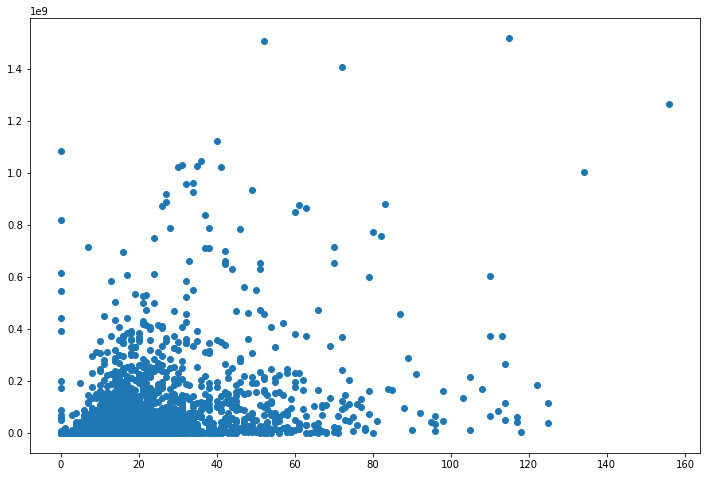

In [942]:
plt.figure(figsize=(12,8))
plt.scatter("castCount", "revenue", data=train)
plt.show()

In [943]:
list_of_actors = []
for l in train['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

print(len(list_of_actors))
unique_actors = set(list_of_actors)
print(len(unique_actors))
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)

61811
38588


[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21),
 ('Frank Welker', 20),
 ('Michael Caine', 20),
 ('George Clooney', 20),
 ('Denzel Washington', 20),
 ('Robert Duvall', 20),
 ('Ed Harris', 20),
 ('Dennis Quaid', 20),
 ('Richard Jenkins', 20),
 ('Matt Damon', 20),
 ('Christopher Plummer', 19),
 ('Gene Hackman', 19),
 ('Christopher Walken', 19),
 ('William H. Macy', 19),
 ('James Franco', 19),
 ('Jim Broadbent', 19),
 ('John C. Reilly', 19),
 ('Kevin Bacon', 19),
 ('Christian Bale', 19),
 ('Alec Baldwin', 19),
 ('Allison Janney', 18),
 ('Brian Cox', 18),
 ('John Leg

In [944]:
train['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in train['list_of_cast']], index =list(range(1,3001)))
train

,budget,popularity,runtime,cast,crew,revenue,logRevenue,has_collection,isBudgetDirty,genre_count,...,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount,countTop100Actors
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,1,0,1,...,0,0,20,2,2015,1,4,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",24,1
2,4.000000e+07,8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,1,0,4,...,0,0,6,8,2004,1,4,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",20,0
3,3.300000e+06,64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,0,0,1,...,0,0,10,10,2014,1,12,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",51,1
4,1.200000e+06,3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,16.588099,0,0,2,...,0,0,9,3,2012,0,7,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",7,0
5,3.142419e+07,1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,15.182614,0,1,2,...,0,0,5,2,2009,0,0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,14.283441,0,1,2,...,0,0,22,4,1994,1,19,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...",15,1
2997,3.142419e+07,3.727996,102.0,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,12.103985,0,1,2,...,0,0,28,3,2013,0,6,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...",11,0
2998,6.500000e+07,14.482345,120.0,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,18.309266,0,0,4,...,0,0,11,10,1996,1,14,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...",15,2


In [945]:
set(train['list_of_cast'].iloc[2]) & set(top_100_actors)

{'J.K. Simmons'}

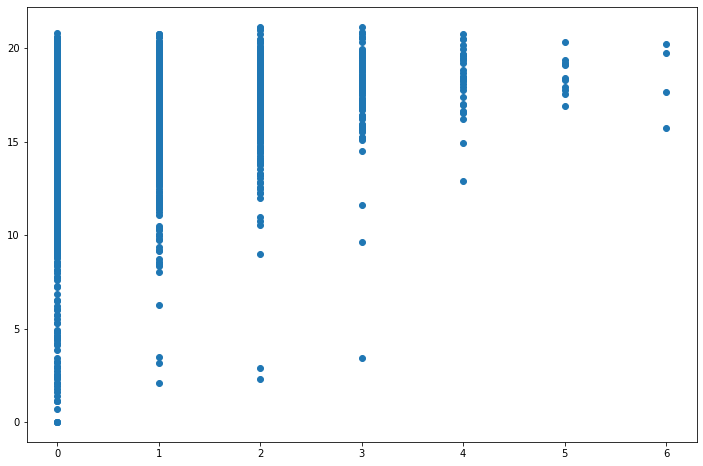

In [946]:
plt.figure(figsize=(12,8))
plt.scatter("countTop100Actors", "logRevenue", data=train)
plt.show()

In [947]:
#checked_actors = []
#for i, l in enumerate(train['list_of_cast']):
 #   for act in l:
  #      colName = 'is'+act
   #     if(act in top_100_actors and act not in checked_actors):
    #        checked_actors.append(act)
     #       train[colName] = pd.Series([1 if act in x else 0 for x in train['list_of_cast']], index =list(range(1,3001)))
#train

In [948]:
#for act in top_100_actors:
 #   col = 'is' + act
  #  print(col)
   # plt.figure(figsize=(3,3))
    #plt.scatter(col, "logRevenue", data=train)
    #plt.show()

In [949]:
train = train.drop(['cast'], axis=1)
train = train.drop(['list_of_cast'], axis=1)

CREW

In [950]:
train['list_of_crew'] = train['crew'].apply(lambda x: [act['name'] for act in x])


In [951]:
train['crew_count'] = train['list_of_crew'].apply(lambda x: len(x))

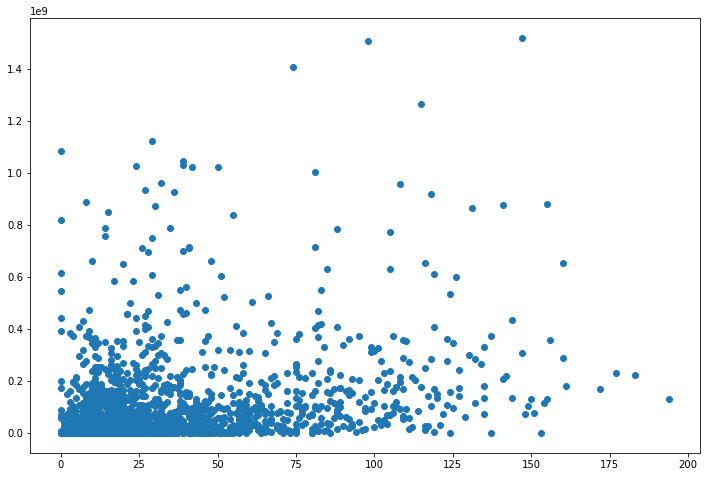

In [952]:
plt.figure(figsize=(12,8))
plt.scatter("crew_count", "revenue", data=train)
plt.show()

In [953]:
train = train.drop(['list_of_crew'], axis=1)
train = train.drop(['crew'], axis=1)

In [954]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   budget                                    3000 non-null   float64
 1   popularity                                3000 non-null   float64
 2   runtime                                   3000 non-null   float64
 3   revenue                                   3000 non-null   int64  
 4   logRevenue                                3000 non-null   float64
 5   has_collection                            3000 non-null   int64  
 6   isBudgetDirty                             3000 non-null   int64  
 7   genre_count                               3000 non-null   int64  
 8   hasHomepage                               3000 non-null   int64  
 9   is_english                                3000 non-null   int64  
 10  isParamount Pictures                

In [955]:
train

,budget,popularity,runtime,revenue,logRevenue,has_collection,isBudgetDirty,genre_count,hasHomepage,is_english,...,isRelativity Media,isWorking Title Films,release_day,release_month,release_year,hasTagline,keywordsCount,castCount,countTop100Actors,crew_count
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,93.0,12314651,16.326300,1,0,1,0,1,...,0,0,20,2,2015,1,4,24,1,72
2,4.000000e+07,8.248895,113.0,95149435,18.370959,1,0,4,0,1,...,0,0,6,8,2004,1,4,20,0,9
3,3.300000e+06,64.299990,105.0,13092000,16.387512,0,0,1,1,1,...,0,0,10,10,2014,1,12,51,1,64
4,1.200000e+06,3.174936,122.0,16000000,16.588099,0,0,2,1,0,...,0,0,9,3,2012,0,7,7,0,3
5,3.142419e+07,1.148070,118.0,3923970,15.182614,0,1,2,0,0,...,0,0,5,2,2009,0,0,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,3.142419e+07,9.853270,102.0,1596687,14.283441,0,1,2,0,1,...,0,0,22,4,1994,1,19,15,1,17
2997,3.142419e+07,3.727996,102.0,180590,12.103985,0,1,2,0,0,...,0,0,28,3,2013,0,6,11,0,15
2998,6.500000e+07,14.482345,120.0,89456761,18.309266,0,0,4,0,1,...,0,0,11,10,1996,1,14,15,2,10


Predizioni

Baseline con Regressione lineare

In [980]:
dataset = train.astype(float).values
x = dataset[:, :2]
y = dataset[:,3]
pca = PCA(n_components=1)
x = pca.fit_transform(x)

In [981]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [971]:
x

array([[-17424185.22501164],
       [  8575814.77498831],
       [-28124185.22500555],
       ...,
       [ 33575814.77498882],
       [ 10575814.77498909],
       [  3575814.77498858]])

In [982]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
model.score(x_test, y_test)

Intercept:  67131902.38890475
Coefficients [slopes]: [2.94098569]

Train Error : 9763078678897512.000
Test Error : 8435797985416258.000


0.47630189457513206

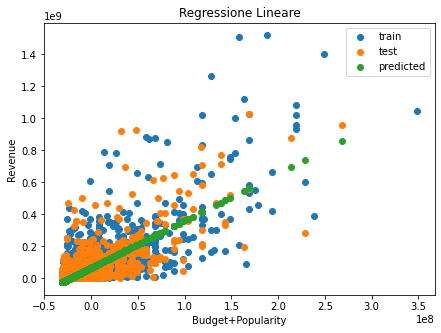

In [983]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_train, y_train, label='train')
ax.scatter(x_test, y_test, label='test')
ax.scatter(x_test, y_pred_test, label='predicted')
ax.set_title("Regressione Lineare")
ax.set_xlabel("Budget+Popularity")
ax.set_ylabel("Revenue")
ax.legend()

Baseline con Albero di decisione

In [985]:
x = dataset[:, :2]
y = dataset[:,3]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_train)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=30)
dt.fit(scaler.transform(x_train),y_train)
train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(scaler.transform(x_train)))
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(scaler.transform(x_test)))
print(train_acc)
print(test_acc)
print(dt.score(scaler.transform(x_test), y_test))

4859199314151875.0
6684126636085972.0
0.60260594419036


In [962]:
scaler.transform(x_train)

array([[0.10239537, 0.02660245],
       [0.06554356, 0.02517243],
       [0.13135036, 0.02605458],
       ...,
       [0.08245376, 0.02610517],
       [0.06291129, 0.01438174],
       [0.06291129, 0.01426101]])